# Projeto PAR 2025 – Ensemble de Modelos (Colab)

Este repositório apresenta a implementação de uma prova de conceito para o desafio PAR 2025, realizada em Google Colab. O objetivo principal do trabalho foi testar a eficácia de um ensemble composto por modelos distintos, avaliando métricas e explorando caminhos possíveis para trabalhos futuros, mesmo sob fortes limitações de hardware e tempo.

---

## Objetivo do Projeto

Devido ao tamanho da base original (94.293 imagens) e restrições de processamento, realizamos:

* Redução da base de treino, priorizando classes menos representadas.
* Uso da base completa original de validação para testes finais.
* Criação e avaliação de modelos independentes + ensemble.

---

## Estrutura Geral do Colab

As células do notebook foram organizadas de forma a facilitar a execução sequencial do projeto. A divisão geral é:

### 1. **Carregamento da Base (Google Drive)**

Antes de rodar qualquer modelo, é necessário executar a célula que monta o Google Drive e carrega a base reduzida para o diretório `/content`.

### 2. **Treinamento dos Modelos**

Cada modelo possui seu próprio bloco de código, incluindo:

* Importação das bibliotecas necessárias.
* Pré-processamento e data loaders.
* Treinamento + salvamento de pesos.

Os modelos utilizados foram:

* **MobileNetV2** (TensorFlow/PyTorch) - 2 versões
* **EfficientNetB0** (TensorFlow/PyTorch) - 2 versões
* **YOLO** (PyTorch/Ultralytics) - 1 modelo separado por tarefa (task-specific)

Os arquivos gerados:

* `.keras` e `.h5` para modelos Keras
* `.pt` para modelos PyTorch

Recomenda-se o uso de GPU no Colab.

---

## Validação

A etapa de validação é dividida em duas partes:

### 1. **Carregar Base de Validação**

Assim como na base de treino, a validação é baixada do Google Drive de um integrante do grupo.

### 2. **Validação Individual**

Há células específicas para carregar cada modelo já treinado e rodar suas métricas separadamente.

### 3. **Validação por Ensemble**

O ensemble recebe todos os `.pt` (modelos com Pytorch) e combina suas saídas para gerar previsões finais.

O ensemble está localizado na seção de

Validação, enquanto as análises individuais estão separadas em Validação Individual.

---

##Fluxo de Execução do Colab

Montar o Google Drive.

Baixar a base reduzida de treino para o diretório /content.

Visualizar a base e conferir organização das pastas.

Executar o bloco da MobileNetV2 (importações, preparação e treino).

Executar o bloco dos modelos YOLO (um bloco por tarefa).

Executar o bloco da EfficientNetB0.

Baixar a base de validação original.

Rodar a validação do ensemble.

Rodar validações individuais dos modelos.

---

## Considerações Finais

Dado o limite de tempo e hardware, o foco foi demonstrar:

* A viabilidade técnica da montagem de um ensemble
* O comportamento de modelos distintos sobre a mesma base
* Um caminho inicial para pesquisa e melhorias futuras

Mesmo com resultados modestos, o trabalho evidencia que com mais tempo de treinamento e infraestrutura seria possível alcançar métricas superiores.

---

## Autores

Arthur Przygocki

Carlos Eduardo Rodrigues Mello

Gabriel Yuichi Suzaki

Henrique Tetilha Golias

Maria Julia Prado Lazaroto


## Chamando base

In [ ]:
#LINK DA BASE POS BALANCEAMENTO

#https://drive.google.com/file/d/1vWthGb1JNTvbO9rhhF-0Crj-pYZ2fYSS/view?usp=sharing

In [ ]:
# Instalar gdown (caso ainda não tenha)
!pip install -q gdown

# ID do arquivo no Google Drive
training_zip_id = "1vWthGb1JNTvbO9rhhF-0Crj-pYZ2fYSS"

# Nome do arquivo de destino
zip_path = "training_set.zip"
extract_folder = "training_set_extracted"

# Fazer o download do ZIP
!gdown --id $training_zip_id -O $zip_path

# Extrair o conteúdo do ZIP
import zipfile
import os

os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Arquivos baixados e extraídos com sucesso!")
print("Conteúdo extraído em:", extract_folder)
!ls -lh $extract_folder


/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1vWthGb1JNTvbO9rhhF-0Crj-pYZ2fYSS
From (redirected): https://drive.google.com/uc?id=1vWthGb1JNTvbO9rhhF-0Crj-pYZ2fYSS&confirm=t&uuid=681fece1-32c8-4ac8-800e-b32df8d6ef59
To: /content/training_set.zip
100% 244M/244M [00:07<00:00, 30.7MB/s]
Arquivos baixados e extraídos com sucesso!
Conteúdo extraído em: training_set_extracted
total 2.0M
drwxr-xr-x 2 root root 1.1M Nov  7 12:21 training_set
-rw-r--r-- 1 root root 851K Nov  7 12:21 training_set_balanced.txt


Lendo arquivo TXT...

Arquivo carregado!
Total de imagens: 26,558

=== Top Color (Parte Superior) ===
top_color
1     7565
2     7433
3      640
4     1113
5      529
6      998
7     1016
8      951
9     1338
10    4482
11     493
Name: count, dtype: int64
top_color
1     28.48
2     27.99
3      2.41
4      4.19
5      1.99
6      3.76
7      3.83
8      3.58
9      5.04
10    16.88
11     1.86
Name: count, dtype: float64



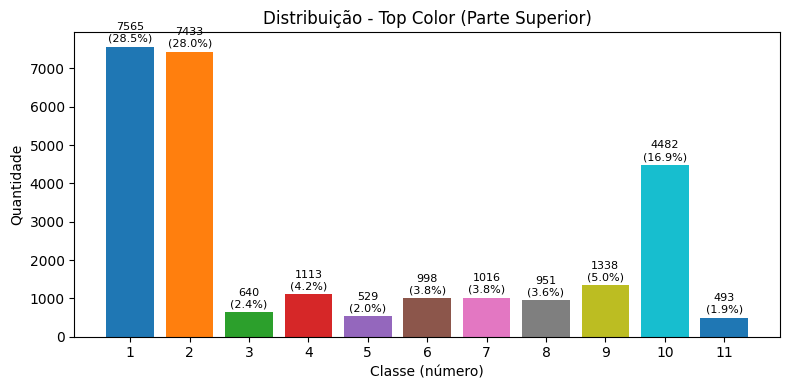

=== Bottom Color (Parte Inferior) ===
bottom_color
1     12154
2      3457
3       419
4      6274
5       443
6       600
7       592
8       776
9       525
10      838
11      480
Name: count, dtype: int64
bottom_color
1     45.76
2     13.02
3      1.58
4     23.62
5      1.67
6      2.26
7      2.23
8      2.92
9      1.98
10     3.16
11     1.81
Name: count, dtype: float64



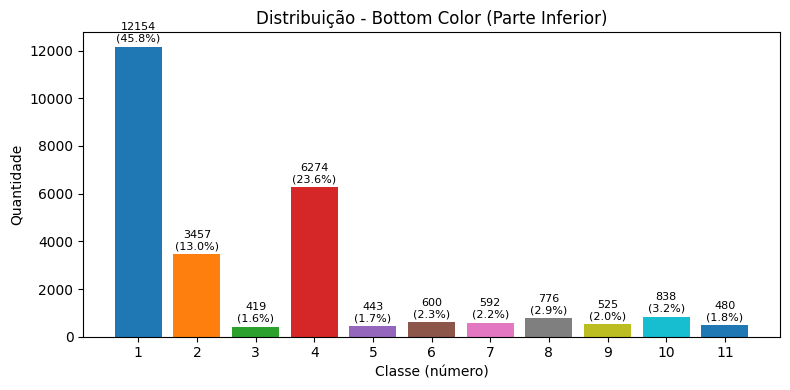

=== Gênero ===
gender
0    23399
1     3159
Name: count, dtype: int64
gender
0    88.11
1    11.89
Name: count, dtype: float64



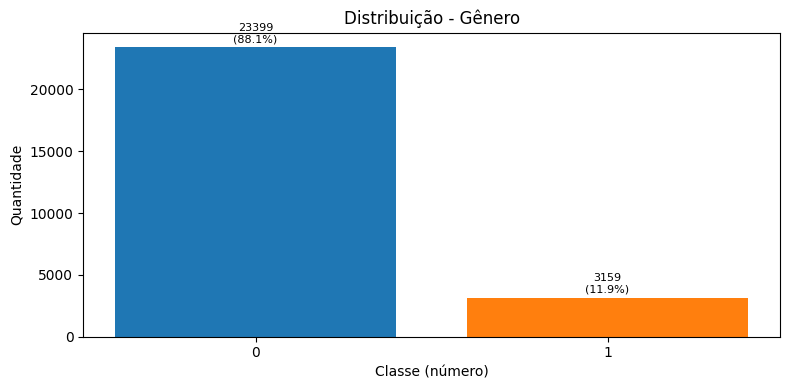

=== Uso de Chapéu ===
hat
0     8581
1    17977
Name: count, dtype: int64
hat
0    32.31
1    67.69
Name: count, dtype: float64



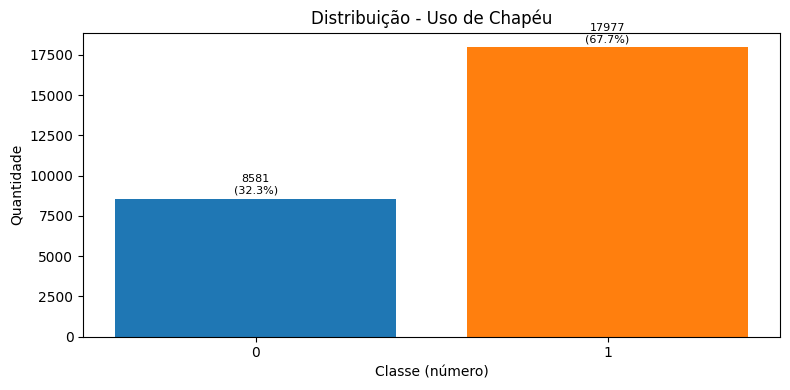

=== Uso de Bolsa ===
bag
0    10012
1    16546
Name: count, dtype: int64
bag
0    37.7
1    62.3
Name: count, dtype: float64



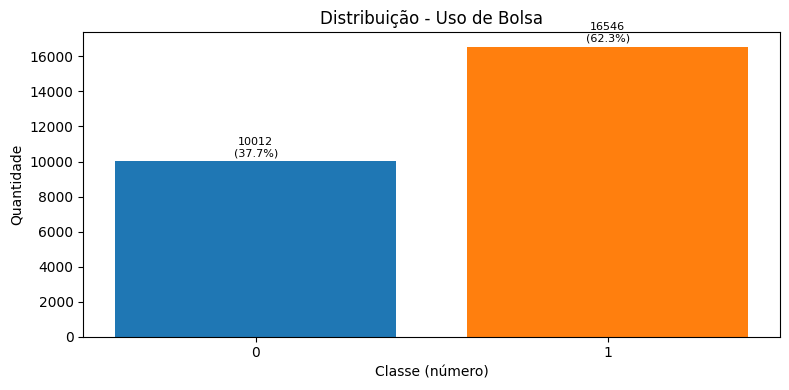

Análise concluída!


In [ ]:
#DISTRIBUIÇÃO DA BASE
import subprocess, sys
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Caminho do TXT
txt_path = "/content/training_set_extracted/training_set_balanced.txt"

print("Lendo arquivo TXT...\n")
df = pd.read_csv(txt_path, header=0, sep=",")
df.columns = ["filename", "top_color", "bottom_color", "gender", "hat", "bag"]

print("Arquivo carregado!")
print(f"Total de imagens: {len(df):,}\n")


# Função de contagem e plot
def contar_e_plotar(coluna, titulo):
    contagem = df[coluna].value_counts().sort_index()
    porcentagem = contagem / contagem.sum() * 100

    print(f"=== {titulo} ===")
    print(contagem)
    print(porcentagem.round(2))
    print()

    labels = contagem.index.astype(str)
    valores = contagem.values

    plt.figure(figsize=(8, 4))
    bars = plt.bar(labels, valores, color=plt.cm.tab10.colors)

    # Exibir valores e % acima das barras
    for i, (v, p) in enumerate(zip(valores, porcentagem)):
        plt.text(i, v + max(valores)*0.01, f"{v}\n({p:.1f}%)",
                 ha='center', va='bottom', fontsize=8)

    plt.title(f"Distribuição - {titulo}")
    plt.xlabel("Classe (número)")
    plt.ylabel("Quantidade")
    plt.tight_layout()
    plt.show()


# Gerar gráficos
contar_e_plotar("top_color", "Top Color (Parte Superior)")
contar_e_plotar("bottom_color", "Bottom Color (Parte Inferior)")
contar_e_plotar("gender", "Gênero")
contar_e_plotar("hat", "Uso de Chapéu")
contar_e_plotar("bag", "Uso de Bolsa")

print("Análise concluída!")


## MobileNetv2

In [ ]:
# PIPELINE - MOBILENETV2 EM PYTORCH (MULTITASK)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
from PIL import Image
import pandas as pd
import os
import gc

# CONFIGURAÇÕES
IMG_DIR = "/content/training_set_extracted/training_set"
IMG_SIZE = (224, 224)
BATCH_SIZE = 8
chunk_size = 5000
EPOCHS = 5
device = "cuda" if torch.cuda.is_available() else "cpu"

# CARREGAR CSV E PATHS
labels_df = pd.read_csv("/content/training_set_extracted/training_set_balanced.txt")
labels_df["filepath"] = labels_df["filename"].apply(lambda x: os.path.join(IMG_DIR, x))

# MAPEAMENTO GLOBAL
top_mapping = {cls: i for i, cls in enumerate(sorted(labels_df["top_color"].unique()))}
bottom_mapping = {cls: i for i, cls in enumerate(sorted(labels_df["bottom_color"].unique()))}

labels_df["top_color_idx"] = labels_df["top_color"].map(top_mapping)
labels_df["bottom_color_idx"] = labels_df["bottom_color"].map(bottom_mapping)

NUM_COLORS_TOP = len(top_mapping)
NUM_COLORS_BOTTOM = len(bottom_mapping)

# DIVISÃO GLOBAL
val_split = int(len(labels_df) * 0.05)
val_df = labels_df.sample(val_split, random_state=42)
train_df = labels_df.drop(val_df.index)


# DATASET

class ClothingDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        img = Image.open(row["filepath"]).convert("RGB")
        if self.transform:
            img = self.transform(img)

        hat = torch.tensor(row["hat"], dtype=torch.float32)
        bag = torch.tensor(row["bag"], dtype=torch.float32)
        gender = torch.tensor(row["gender"], dtype=torch.long)
        top = torch.tensor(row["top_color_idx"], dtype=torch.long)
        bottom = torch.tensor(row["bottom_color_idx"], dtype=torch.long)

        return img, hat, bag, gender, top, bottom


# TRANSFORMAÇÕES CORRETAS

weights = MobileNet_V2_Weights.IMAGENET1K_V1
transform = weights.transforms()

val_dataset = ClothingDataset(val_df, transform)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)


# MODELO MOBILE NET V2 MULTITASK

class MobileNetV2MultiTask(nn.Module):
    def __init__(self, num_top, num_bottom):
        super().__init__()

        self.base = mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1)

        # Congelar backbone
        for param in self.base.parameters():
            param.requires_grad = False

        in_features = self.base.classifier[1].in_features
        self.base.classifier = nn.Identity()

        self.hat = nn.Linear(in_features, 1)
        self.bag = nn.Linear(in_features, 1)
        self.gender = nn.Linear(in_features, 2)
        self.top_color = nn.Linear(in_features, num_top)
        self.bottom_color = nn.Linear(in_features, num_bottom)

    def forward(self, x):
        feats = self.base(x)
        return (
            torch.sigmoid(self.hat(feats)),
            torch.sigmoid(self.bag(feats)),
            self.gender(feats),
            self.top_color(feats),
            self.bottom_color(feats)
        )


model = MobileNetV2MultiTask(NUM_COLORS_TOP, NUM_COLORS_BOTTOM).to(device)


# OTIMIZADOR E LOSS

optimizer = optim.Adam(model.parameters(), lr=1e-4)

bce = nn.BCELoss()
ce = nn.CrossEntropyLoss()


# LOOP DE TREINO

def train_one_epoch(loader):
    model.train()
    running_loss = 0

    for batch in loader:
        imgs, hat, bag, gender, top, bottom = batch

        imgs = imgs.to(device)
        hat = hat.to(device)
        bag = bag.to(device)
        gender = gender.to(device)
        top = top.to(device)
        bottom = bottom.to(device)

        optimizer.zero_grad()

        o_hat, o_bag, o_gender, o_top, o_bottom = model(imgs)

        loss = (
            bce(o_hat.squeeze(), hat) +
            bce(o_bag.squeeze(), bag) +
            ce(o_gender, gender) +
            ce(o_top, top) +
            ce(o_bottom, bottom)
        )

        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    return running_loss / len(loader)


def validate():
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for imgs, hat, bag, gender, top, bottom in val_loader:

            imgs = imgs.to(device)
            hat = hat.to(device)
            bag = bag.to(device)
            gender = gender.to(device)
            top = top.to(device)
            bottom = bottom.to(device)

            o_hat, o_bag, o_gender, o_top, o_bottom = model(imgs)

            loss = (
                bce(o_hat.squeeze(), hat) +
                bce(o_bag.squeeze(), bag) +
                ce(o_gender, gender) +
                ce(o_top, top) +
                ce(o_bottom, bottom)
            )

            total_loss += loss.item()

    return total_loss / len(val_loader)


# TREINO POR CHUNKS

for epoch in range(EPOCHS):
    print(f"\n========================")
    print(f"EPOCH {epoch+1}/{EPOCHS} — Treinando todos os chunks")
    print(f"========================")

    for start in range(0, len(train_df), chunk_size):
        end = start + chunk_size
        subset_df = train_df.iloc[start:end]

        print(f"\n Treinando chunk {start} até {end}... ({len(subset_df)} exemplos)")

        train_dataset = ClothingDataset(subset_df, transform)
        train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

        train_loss = train_one_epoch(train_loader)
        val_loss = validate()

        print(f"Loss treino: {train_loss:.4f} | Loss validação: {val_loss:.4f}")

        del train_dataset, train_loader
        gc.collect()

# SALVAR MODELO

torch.save(model.state_dict(), "mobilenetv2_multitask.pt")
print(" Modelo salvo em mobilenetv2_multitask.pt")


In [ ]:
# PIPELINE - MOBILENETV2 (VERSÃO 1.5)

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import LambdaCallback, ReduceLROnPlateau, ModelCheckpoint
import pandas as pd
import os
import gc

# CONFIGURAÇÕES
IMG_DIR = "/content/training_set_extracted/training_set"
IMG_SIZE = (224, 224)
BATCH_SIZE = 8
chunk_size = 5000
EPOCHS_PER_CHUNK = 5

# CARREGAR CSV E PATHS
labels_df = pd.read_csv("/content/training_set_extracted/training_set_balanced.txt")
labels_df["filepath"] = labels_df["filename"].apply(lambda x: os.path.join(IMG_DIR, x))

# MAPEAMENTO GLOBAL
top_mapping = {cls: i for i, cls in enumerate(sorted(labels_df["top_color"].unique()))}
bottom_mapping = {cls: i for i, cls in enumerate(sorted(labels_df["bottom_color"].unique()))}
labels_df["top_color_idx"] = labels_df["top_color"].map(top_mapping)
labels_df["bottom_color_idx"] = labels_df["bottom_color"].map(bottom_mapping)

NUM_COLORS_TOP = len(top_mapping)
NUM_COLORS_BOTTOM = len(bottom_mapping)

# DIVISÃO GLOBAL (5% validação fixa)
val_split = int(len(labels_df) * 0.05)
val_df = labels_df.sample(val_split, random_state=42)
train_df = labels_df.drop(val_df.index)

# DATASET
def process_row(filepath, hat, bag, gender, top_color, bottom_color):
    img = tf.io.read_file(filepath)
    img = tf.io.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.resize(img, IMG_SIZE)
    img = img / 255.0

    labels = {
        "hat": tf.cast(hat, tf.float32),
        "bag": tf.cast(bag, tf.float32),
        "gender": tf.one_hot(gender, depth=2),
        "top_color": tf.one_hot(top_color, depth=NUM_COLORS_TOP),
        "bottom_color": tf.one_hot(bottom_color, depth=NUM_COLORS_BOTTOM),
    }
    return img, labels

def make_dataset(df, is_training=True):
    ds = tf.data.Dataset.from_tensor_slices((
        df["filepath"].values,
        df["hat"].values,
        df["bag"].values,
        df["gender"].values,
        df["top_color_idx"].values,
        df["bottom_color_idx"].values
    ))
    ds = ds.map(process_row, num_parallel_calls=tf.data.AUTOTUNE)
    if is_training:
        ds = ds.shuffle(buffer_size=min(len(df), 2000))
    ds = ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return ds

val_ds = make_dataset(val_df, is_training=False)


# MODELO
base_model = MobileNetV2(input_shape=IMG_SIZE + (3,), include_top=False, weights="imagenet")
base_model.trainable = False
for layer in base_model.layers:
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = False

inputs = layers.Input(shape=IMG_SIZE + (3,))
x = layers.Lambda(lambda t: t * 2.0 - 1.0)(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)

hat_output = layers.Dense(1, activation='sigmoid', name='hat')(x)
bag_output = layers.Dense(1, activation='sigmoid', name='bag')(x)
gender_output = layers.Dense(2, activation='softmax', name='gender')(x)
top_color_output = layers.Dense(NUM_COLORS_TOP, activation='softmax', name='top_color')(x)
bottom_color_output = layers.Dense(NUM_COLORS_BOTTOM, activation='softmax', name='bottom_color')(x)

model = models.Model(inputs=inputs,
                     outputs=[hat_output, bag_output, gender_output, top_color_output, bottom_color_output])


# COMPILE
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss={
        'hat': 'binary_crossentropy',
        'bag': 'binary_crossentropy',
        'gender': 'categorical_crossentropy',
        'top_color': 'categorical_crossentropy',
        'bottom_color': 'categorical_crossentropy'
    },
    metrics={
        'hat': 'accuracy',
        'bag': 'accuracy',
        'gender': 'accuracy',
        'top_color': tf.keras.metrics.TopKCategoricalAccuracy(k=3),
        'bottom_color': tf.keras.metrics.TopKCategoricalAccuracy(k=3)
    }
)

# CALLBACKS
callbacks = [
    LambdaCallback(on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}: {logs}")),
    ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=2, verbose=1),
    ModelCheckpoint("mobilenetv2_chunk_weights.h5", save_best_only=True, monitor='val_loss', mode='min')
]


# TREINO POR CHUNKS
EPOCHS = 5  # total de epochs sobre toda a base

for epoch in range(EPOCHS):
    print(f"\n========================")
    print(f"EPOCH {epoch + 1}/{EPOCHS} — Treinando todos os chunks")
    print(f"========================")

    for start in range(0, len(train_df), chunk_size):
        end = start + chunk_size
        subset_df = train_df.iloc[start:end]

        print(f"\n Treinando chunk {start} até {end}... ({len(subset_df)} exemplos)")

        train_ds_chunk = make_dataset(subset_df, is_training=True)

        model.fit(
            train_ds_chunk,
            validation_data=val_ds,
            epochs=1,
            callbacks=callbacks,
            verbose=1
        )

        # Libera RAM entre chunks
        del train_ds_chunk
        gc.collect()


# (opcional) Fine-tuning leve após alguns chunks:
# base_model.trainable = True
# for layer in base_model.layers[:-40]:
#     layer.trainable = False
# model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), ...)


# SALVAR MODELO COMPLETO E PESOS

full_model_path = "mobilenetv2_model.keras"
model.save(full_model_path)  # salva modelo completo

print(f"Modelo completo salvo em: {full_model_path}")

weights_path = "mobilenetv2_final.weights.h5"
model.save_weights(weights_path)

print(f"Pesos do modelo salvos em: {weights_path}")




9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

EPOCH 1/5 — Treinando todos os chunks

🔹 Treinando chunk 0 até 5000... (5000 exemplos)
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - bag_accuracy: 0.7184 - bag_loss: 0.5650 - bottom_color_loss: 2.0517 - bottom_color_top_k_categorical_accuracy: 0.6294 - gender_accuracy: 0.5945 - gender_loss: 0.7075 - hat_accuracy: 0.7649 - hat_loss: 0.4650 - loss: 5.7748 - top_color_loss: 1.9856 - top_color_top_k_categorical_accuracy: 0.6006

Epoch 1: {'bag_accuracy': 0.7620000243186951, 'bag_loss': 0.5083779096603394, 'bottom_color_loss': 1.7264400720596313, 'bottom_color_top_k_categorical_accuracy': 0.7337999939918518, 'gender_accuracy': 0.6373999714851379, 'gender_loss': 0.654295027256012, 'hat_accuracy': 0.8497999906539917, 'hat_loss': 0.33776673674583435, 'loss': 4.883274555206299, 'top_color_loss': 1.6563966274261475, 'top_color_top_k_categorical_accuracy': 0.7089999914169312, 'val_bag_accuracy': 0.6382818222045898, 'val_bag_loss': 0.6727287769317627, 'val_bottom_color_loss': 1.8077776432037354, 'val_bottom_color_top_k_categorical_accuracy': 0.7716653943061829, 'val_gender_accuracy': 0.5003767609596252, 'val_gender_loss': 0.8026004433631897, 'val_hat_accuracy': 0.7091183066368103, 'val_hat_loss': 0.6287485361099243, 'val_loss': 5.9752516746521, 'val_top_color_loss': 2.0641915798187256, 'val_top_color_top_k_categorical_accuracy': 0.5855312943458557}
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 47ms/step - bag_accuracy: 0.7185 - ba

Epoch 1: {'bag_accuracy': 0.8790000081062317, 'bag_loss': 0.28707098960876465, 'bottom_color_loss': 0.9762874841690063, 'bottom_color_top_k_categorical_accuracy': 0.946399986743927, 'gender_accuracy': 0.8784000277519226, 'gender_loss': 0.28528839349746704, 'hat_accuracy': 0.8600000143051147, 'hat_loss': 0.3644695580005646, 'loss': 2.6612496376037598, 'top_color_loss': 0.7481321692466736, 'top_color_top_k_categorical_accuracy': 0.8895999789237976, 'val_bag_accuracy': 0.6043707728385925, 'val_bag_loss': 0.7920055389404297, 'val_bottom_color_loss': 1.5769683122634888, 'val_bottom_color_top_k_categorical_accuracy': 0.8236624002456665, 'val_gender_accuracy': 0.9058025479316711, 'val_gender_loss': 0.25025612115859985, 'val_hat_accuracy': 0.6985682249069214, 'val_hat_loss': 0.5812631845474243, 'val_loss': 5.403543472290039, 'val_top_color_loss': 2.203331708908081, 'val_top_color_top_k_categorical_accuracy': 0.647324800491333}
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - bag_accuracy: 0.8250 -

Epoch 1: {'bag_accuracy': 0.7261999845504761, 'bag_loss': 0.5344531536102295, 'bottom_color_loss': 1.5200603008270264, 'bottom_color_top_k_categorical_accuracy': 0.7572000026702881, 'gender_accuracy': 1.0, 'gender_loss': 0.000968831533100456, 'hat_accuracy': 0.8895999789237976, 'hat_loss': 0.3307753801345825, 'loss': 3.2320125102996826, 'top_color_loss': 0.8457527160644531, 'top_color_top_k_categorical_accuracy': 0.9283999800682068, 'val_bag_accuracy': 0.6480783820152283, 'val_bag_loss': 0.6229744553565979, 'val_bottom_color_loss': 1.1754508018493652, 'val_bottom_color_top_k_categorical_accuracy': 0.8756594061851501, 'val_gender_accuracy': 0.8892238140106201, 'val_gender_loss': 0.7436195015907288, 'val_hat_accuracy': 0.8183873295783997, 'val_hat_loss': 0.40780818462371826, 'val_loss': 4.1793341636657715, 'val_top_color_loss': 1.2286967039108276, 'val_top_color_top_k_categorical_accuracy': 0.8485305309295654}
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - bag_accuracy: 0.7439 - bag_loss: 

Epoch 1: {'bag_accuracy': 0.76419997215271, 'bag_loss': 0.48894137144088745, 'bottom_color_loss': 1.2782572507858276, 'bottom_color_top_k_categorical_accuracy': 0.8381999731063843, 'gender_accuracy': 0.7436000108718872, 'gender_loss': 0.5413526892662048, 'hat_accuracy': 0.8809999823570251, 'hat_loss': 0.2906358540058136, 'loss': 3.8077828884124756, 'top_color_loss': 1.2085983753204346, 'top_color_top_k_categorical_accuracy': 0.828000009059906, 'val_bag_accuracy': 0.7701582312583923, 'val_bag_loss': 0.5001417994499207, 'val_bottom_color_loss': 1.1765639781951904, 'val_bottom_color_top_k_categorical_accuracy': 0.8862094879150391, 'val_gender_accuracy': 0.8907309770584106, 'val_gender_loss': 0.3161144256591797, 'val_hat_accuracy': 0.8349660634994507, 'val_hat_loss': 0.3981509804725647, 'val_loss': 3.5927863121032715, 'val_top_color_loss': 1.2024900913238525, 'val_top_color_top_k_categorical_accuracy': 0.8620949387550354}
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - bag_accuracy: 0.7122 - 

Epoch 1: {'bag_accuracy': 0.7580000162124634, 'bag_loss': 0.48266172409057617, 'bottom_color_loss': 1.2824095487594604, 'bottom_color_top_k_categorical_accuracy': 0.8335999846458435, 'gender_accuracy': 1.0, 'gender_loss': 0.0007201253902167082, 'hat_accuracy': 0.909600019454956, 'hat_loss': 0.277281254529953, 'loss': 2.5802969932556152, 'top_color_loss': 0.537223219871521, 'top_color_top_k_categorical_accuracy': 0.9625999927520752, 'val_bag_accuracy': 0.6797286868095398, 'val_bag_loss': 0.5967346429824829, 'val_bottom_color_loss': 0.9932064414024353, 'val_bottom_color_top_k_categorical_accuracy': 0.911077618598938, 'val_gender_accuracy': 0.8892238140106201, 'val_gender_loss': 0.6839646697044373, 'val_hat_accuracy': 0.8462697863578796, 'val_hat_loss': 0.35739409923553467, 'val_loss': 3.576002597808838, 'val_top_color_loss': 0.9438354969024658, 'val_top_color_top_k_categorical_accuracy': 0.8967596292495728}
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - bag_accuracy: 0.7997 - bag_loss: 0.4

Epoch 1: {'bag_accuracy': 0.7764000296592712, 'bag_loss': 0.48075711727142334, 'bottom_color_loss': 1.1156256198883057, 'bottom_color_top_k_categorical_accuracy': 0.8776000142097473, 'gender_accuracy': 0.7767999768257141, 'gender_loss': 0.49560990929603577, 'hat_accuracy': 0.8913999795913696, 'hat_loss': 0.27568840980529785, 'loss': 3.424597978591919, 'top_color_loss': 1.0569180250167847, 'top_color_top_k_categorical_accuracy': 0.86080002784729, 'val_bag_accuracy': 0.7844762802124023, 'val_bag_loss': 0.4651155471801758, 'val_bottom_color_loss': 0.9850217700004578, 'val_bottom_color_top_k_categorical_accuracy': 0.9201205968856812, 'val_gender_accuracy': 0.9148455262184143, 'val_gender_loss': 0.2585383355617523, 'val_hat_accuracy': 0.8711379170417786, 'val_hat_loss': 0.33305686712265015, 'val_loss': 3.0284619331359863, 'val_top_color_loss': 0.987088143825531, 'val_top_color_top_k_categorical_accuracy': 0.9020346403121948}
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - bag_accuracy: 0.7215 

Epoch 1: {'bag_accuracy': 0.7778000235557556, 'bag_loss': 0.4746776819229126, 'bottom_color_loss': 1.0298055410385132, 'bottom_color_top_k_categorical_accuracy': 0.8931999802589417, 'gender_accuracy': 0.7910000085830688, 'gender_loss': 0.46918702125549316, 'hat_accuracy': 0.896399974822998, 'hat_loss': 0.2649557292461395, 'loss': 3.2042791843414307, 'top_color_loss': 0.9656515717506409, 'top_color_top_k_categorical_accuracy': 0.8838000297546387, 'val_bag_accuracy': 0.7761868834495544, 'val_bag_loss': 0.47520914673805237, 'val_bottom_color_loss': 0.928063154220581, 'val_bottom_color_top_k_categorical_accuracy': 0.9269027709960938, 'val_gender_accuracy': 0.9163526892662048, 'val_gender_loss': 0.24614788591861725, 'val_hat_accuracy': 0.8718914985656738, 'val_hat_loss': 0.3028419315814972, 'val_loss': 2.841005563735962, 'val_top_color_loss': 0.8890978097915649, 'val_top_color_top_k_categorical_accuracy': 0.9178598523139954}
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - bag_accuracy: 0.7333 

Epoch 1: {'bag_accuracy': 0.77920001745224, 'bag_loss': 0.47445595264434814, 'bottom_color_loss': 0.9577221870422363, 'bottom_color_top_k_categorical_accuracy': 0.9085999727249146, 'gender_accuracy': 0.7972000241279602, 'gender_loss': 0.46073007583618164, 'hat_accuracy': 0.901199996471405, 'hat_loss': 0.2575214207172394, 'loss': 3.0532803535461426, 'top_color_loss': 0.9028494358062744, 'top_color_top_k_categorical_accuracy': 0.8966000080108643, 'val_bag_accuracy': 0.8153730034828186, 'val_bag_loss': 0.4230845272541046, 'val_bottom_color_loss': 0.9057364463806152, 'val_bottom_color_top_k_categorical_accuracy': 0.9223812818527222, 'val_gender_accuracy': 0.9155991077423096, 'val_gender_loss': 0.25333401560783386, 'val_hat_accuracy': 0.8786736726760864, 'val_hat_loss': 0.29161137342453003, 'val_loss': 2.6606814861297607, 'val_top_color_loss': 0.7871082425117493, 'val_top_color_top_k_categorical_accuracy': 0.9306706786155701}
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - bag_accuracy: 0.7336

## YOLO

In [ ]:
# YOLOv8 Classifier setup
!pip -q install ultralytics

import os
import sys
import torch
from ultralytics import YOLO

print("PyTorch:", torch.__version__)
print("CUDA disponível:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))
else:
    print("Rodando em CPU (pode ficar mais lento)")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PyTorch: 2.8.0+cu126
CUDA disponível: True
GPU: Tesla T4


In [ ]:
# Geração do CSV de cores
import pandas as pd
import os

# Detecta arquivo de labels disponível
candidates = [
    "/content/training_set_extracted/training_set_balanced.txt",
    "/content/training_set_final.txt",
    "/content/training_set_aligned.txt",
    "training_set_final.txt",
    "training_set_aligned.txt"
 ]
labels_path = None
for c in candidates:
    if os.path.exists(c):
        labels_path = c
        break
if labels_path is None:
    raise FileNotFoundError("Nenhum arquivo de labels encontrado. Certifique-se de gerar 'training_set_final.txt' ou 'training_set_aligned.txt'.")

out_dir = "/content/training_labels_for_colors"
os.makedirs(out_dir, exist_ok=True)

orig_df = pd.read_csv(labels_path)

new_df = orig_df[["filename", "top_color", "bottom_color"]].copy()
new_df["top_start"] = 0.0
new_df["top_end"] = 0.6
new_df["bottom_start"] = 0.6
new_df["bottom_end"] = 1.0

new_csv_path = os.path.join(out_dir, "colors_labels.csv")
new_df.to_csv(new_csv_path, index=False)

print(f"Novo CSV criado em: {new_csv_path}")
print(new_df.head())

Novo CSV criado em: /content/training_labels_for_colors/colors_labels.csv
             filename  top_color  bottom_color  top_start  top_end  \
0        000_45_1.jpg          4             4        0.0      0.6   
1        000_45_2.jpg          4             4        0.0      0.6   
2  internet_636_0.jpg          1             2        0.0      0.6   
3  internet_637_0.jpg          5             4        0.0      0.6   
4  internet_638_0.jpg          9             3        0.0      0.6   

   bottom_start  bottom_end  
0           0.6         1.0  
1           0.6         1.0  
2           0.6         1.0  
3           0.6         1.0  
4           0.6         1.0  


In [ ]:
import os
import shutil
import random
import pandas as pd
from PIL import Image

# Base de imagens
img_dir_candidates = [
    "/content/training_set_extracted/training_set_balanced.txt"
    "/content/training_set/training_set",
    "/content/training_set_extracted/training_set",
    "training_set/training_set",
    os.path.join(os.getcwd(), "training_set", "training_set")
 ]
IMG_DIR_FOUND = None
for d in img_dir_candidates:
    if os.path.exists(d):
        IMG_DIR_FOUND = d
        break
if IMG_DIR_FOUND is None:
    raise FileNotFoundError("Diretório de imagens não encontrado. Verifique onde os arquivos foram extraídos.")

csv_path = "/content/training_labels_for_colors/colors_labels.csv"
df = pd.read_csv(csv_path)

base_out = "/content/yolo_colors_cls"
splits = ["train"]
split_fracs = {"train": 0.7, "val": 0.15, "test": 0.15}

top_classes = sorted(df["top_color"].unique())
bottom_classes = sorted(df["bottom_color"].unique())

if os.path.exists(base_out):
    shutil.rmtree(base_out)
os.makedirs(base_out, exist_ok=True)

random.seed(42)
df_shuffled = df.sample(frac=1.0, random_state=42).reset_index(drop=True)
n = len(df_shuffled)
n_train = int(n * split_fracs["train"])
splits_idx = {
    "train": df_shuffled.iloc[:n_train],
    "val": df_shuffled.iloc[n_train:n_train + int(n * split_fracs["val"])],
    "test": df_shuffled.iloc[n_train + int(n * split_fracs["val"]):
                               n_train + int(n * split_fracs["val"]) + int(n * split_fracs["test"])]
}

def save_crop(img_path, y_start, y_end, out_path):
    with Image.open(img_path) as im:
        im = im.convert("RGB")
        w, h = im.size
        top = int(h * y_start)
        bottom = int(h * y_end)
        crop = im.crop((0, top, w, bottom))
        os.makedirs(os.path.dirname(out_path), exist_ok=True)
        crop.save(out_path, "JPEG", quality=95)

created = {"top": 0, "bottom": 0}
missing = []

for split, split_df in splits_idx.items():
    if split_df.empty:
        continue
    for _, row in split_df.iterrows():
        fname = row["filename"]
        img_path = os.path.join(IMG_DIR_FOUND, fname)
        if not os.path.exists(img_path):
            missing.append(fname)
            continue
        # Top
        top_cls = str(row["top_color"])
        top_out = os.path.join(base_out, "top", split, top_cls, fname)
        save_crop(img_path, row["top_start"], row["top_end"], top_out)
        created["top"] += 1
        # Bottom
        bottom_cls = str(row["bottom_color"])
        bot_out = os.path.join(base_out, "bottom", split, bottom_cls, fname)
        save_crop(img_path, row["bottom_start"], row["bottom_end"], bot_out)
        created["bottom"] += 1

print("Crops criados:", created)
if missing:
    print(f"Imagens não encontradas ({len(missing)}), exemplos:", missing[:10])

print("Estrutura final:")
print(os.listdir(base_out))

Crops criados: {'top': 26558, 'bottom': 26558}
Estrutura final:
['bottom', 'top']


In [ ]:
# Treinar dois classificadores YOLOv8
import gc
import torch
from ultralytics import YOLO

try:
    import tensorflow as tf
    tf.keras.backend.clear_session()
    if tf.config.list_physical_devices('GPU'):
        pass
except Exception:
    pass

gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()

top_data = "/content/yolo_colors_cls/top"
bottom_data = "/content/yolo_colors_cls/bottom"

model_top = YOLO('yolov8n-cls.pt')
model_bottom = YOLO('yolov8n-cls.pt')

# Hiperparâmetros
epochs = 5
batch = 8
imgsz = 160
workers = 0
device = 0 if torch.cuda.is_available() else 'cpu'
amp = True

def train_with_backoff(model, data_root, project, name):
    global batch
    attempts = [batch, max(4, batch//2), 2, 1]
    last_err = None
    for b in attempts:
        try:
            print(f"Treinando {name} com batch={b}, imgsz={imgsz}...")
            res = model.train(
                data=data_root,
                epochs=epochs,
                imgsz=imgsz,
                batch=b,
                workers=workers,
                device=device,
                project=project,
                name=name,
                verbose=True,
                cache=False,
                amp=amp,
                dropout=0.0,
                patience=0,
                optimizer='SGD',
            )
            return res
        except RuntimeError as e:
            last_err = e
            print("OOM/erro detectado, liberando memória e tentando batch menor...")
            gc.collect()
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
    if last_err:
        raise last_err

# Treino Top
results_top = train_with_backoff(model_top, top_data, project="runs/colors_top", name="yolov8n-cls-top-lowmem")

# Treino Bottom
results_bottom = train_with_backoff(model_bottom, bottom_data, project="runs/colors_bottom", name="yolov8n-cls-bottom-lowmem")

best_top = os.path.join("runs/colors_top/yolov8n-cls-top-lowmem", "weights", "best.pt")
best_bottom = os.path.join("runs/colors_bottom/yolov8n-cls-bottom-lowmem", "weights", "best.pt")
print("Pesos top:", best_top)
print("Pesos bottom:", best_bottom)

Treinando yolov8n-cls-top-lowmem com batch=8, imgsz=160...
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_colors_cls/top, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=160, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n-cls-top-lowmem, nbs=64, nms=False, opset=None, optimize=False, optimizer

TypeError: expected str, bytes or os.PathLike object, not NoneType

Avaliando Top (camisas)...
Avaliando Bottom (calças)...

📊 MÉTRICAS GERAIS (YOLO):
       Atributo  Accuracy  Precision    Recall  F1-score       mAP
0     top_color  0.888331   0.824620  0.805976  0.811944  0.881948
1  bottom_color  0.768381   0.639121  0.569366  0.586118  0.636617

Relatório de classificação - TOP_COLOR
              precision    recall  f1-score   support

           1       0.94      0.93      0.93      1117
          10       0.89      0.92      0.91       672
          11       0.93      0.76      0.84        84
           2       0.97      0.95      0.96      1109
           3       0.86      0.76      0.81        93
           4       0.72      0.75      0.73       168
           5       0.76      0.78      0.77        83
           6       0.92      0.87      0.89       151
           7       0.72      0.79      0.75       159
           8       0.74      0.55      0.63       141
           9       0.62      0.79      0.70       208

    accuracy              

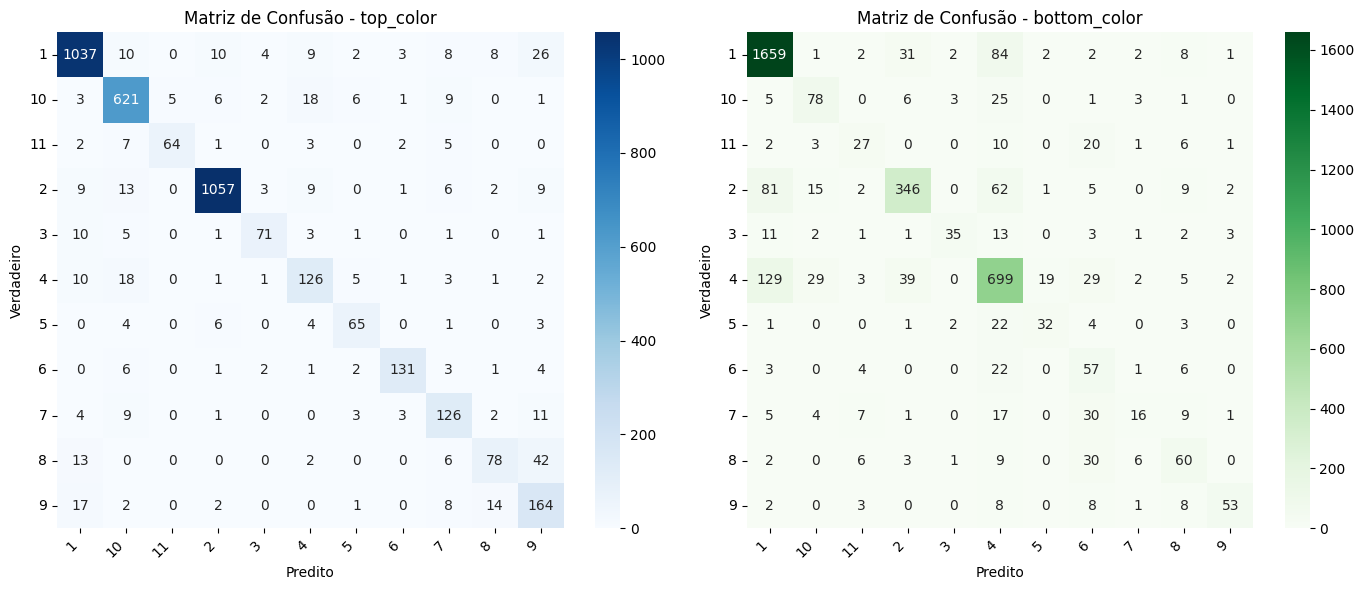

In [ ]:
# Avaliar YOLO
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, average_precision_score
from ultralytics import YOLO
import os

# Recarregar melhores pesos
top_model_path = os.path.join("runs/colors_top/yolov8n-cls-top-lowmem", "weights", "best.pt")
bottom_model_path = os.path.join("runs/colors_bottom/yolov8n-cls-bottom-lowmem", "weights", "best.pt")
model_top_eval = YOLO(top_model_path)
model_bottom_eval = YOLO(bottom_model_path)

top_root = "/content/yolo_colors_cls/top"
bottom_root = "/content/yolo_colors_cls/bottom"
top_classes = sorted(next(os.walk(os.path.join(top_root, 'train')))[1])
bottom_classes = sorted(next(os.walk(os.path.join(bottom_root, 'train')))[1])

def list_images(root):
    test_dir = os.path.join(root, 'test')
    items = []
    for cls in sorted(next(os.walk(test_dir))[1]):
        cls_dir = os.path.join(test_dir, cls)
        for fn in os.listdir(cls_dir):
            if fn.lower().endswith(('.jpg', '.jpeg', '.png')):
                items.append((os.path.join(cls_dir, fn), cls))
    return items

top_items = list_images(top_root)
bottom_items = list_images(bottom_root)

def eval_split(items, model, classes):
    y_true = []
    y_pred = []
    y_scores = []
    for path, cls in items:
        res = model.predict(path, verbose=False)
        probs = res[0].probs.data.cpu().numpy()
        pred_idx = int(np.argmax(probs))
        y_pred.append(pred_idx)
        y_true.append(classes.index(cls))
        y_scores.append(probs)
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_scores = np.stack(y_scores, axis=0)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
    report = classification_report(y_true, y_pred, target_names=classes, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)
    maps = []
    for c in range(len(classes)):
        y_true_bin = (y_true == c).astype(int)
        y_score_c = y_scores[:, c]
        try:
            ap = average_precision_score(y_true_bin, y_score_c)
        except Exception:
            ap = 0.0
        maps.append(ap)
    map_macro = float(np.mean(maps))
    return {
        'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'report': report, 'cm': cm, 'map': map_macro
    }

print("Avaliando Top (camisas)...")
top_metrics = eval_split(top_items, model_top_eval, top_classes)
print("Avaliando Bottom (calças)...")
bottom_metrics = eval_split(bottom_items, model_bottom_eval, bottom_classes)

metrics_df = pd.DataFrame([
    {"Atributo": "top_color", "Accuracy": top_metrics['acc'], "Precision": top_metrics['prec'], "Recall": top_metrics['rec'], "F1-score": top_metrics['f1'], "mAP": top_metrics['map']},
    {"Atributo": "bottom_color", "Accuracy": bottom_metrics['acc'], "Precision": bottom_metrics['prec'], "Recall": bottom_metrics['rec'], "F1-score": bottom_metrics['f1'], "mAP": bottom_metrics['map']},
])
print("\n📊 MÉTRICAS GERAIS (YOLO):")
print(metrics_df)

print("\nRelatório de classificação - TOP_COLOR")
print(top_metrics['report'])
print("\nRelatório de classificação - BOTTOM_COLOR")
print(bottom_metrics['report'])

fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.heatmap(top_metrics['cm'], annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matriz de Confusão - top_color')
axes[0].set_xlabel('Predito')
axes[0].set_ylabel('Verdadeiro')
axes[0].set_xticklabels(top_classes, rotation=45, ha='right')
axes[0].set_yticklabels(top_classes, rotation=0)

sns.heatmap(bottom_metrics['cm'], annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Matriz de Confusão - bottom_color')
axes[1].set_xlabel('Predito')
axes[1].set_ylabel('Verdadeiro')
axes[1].set_xticklabels(bottom_classes, rotation=45, ha='right')
axes[1].set_yticklabels(bottom_classes, rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Monta datasets de classificação YOLO para hat/bag/gender
import os
import shutil
import random
import pandas as pd

labels_candidates = [
    "/content/training_set_extracted/training_set_balanced.txt",
    "/content/training_set_final.txt",
    "/content/training_set_aligned.txt",
    "training_set_final.txt",
    "training_set_aligned.txt"
]
labels_path = None
for c in labels_candidates:
    if os.path.exists(c):
        labels_path = c
        break
if labels_path is None:
    raise FileNotFoundError("Nenhum arquivo de labels encontrado. Gere 'training_set_final.txt' ou 'training_set_aligned.txt'.")

img_dir_candidates = [
    "/content/training_set/training_set",
    "/content/training_set_extracted/training_set",
    "training_set/training_set",
    os.path.join(os.getcwd(), "training_set", "training_set")
]
IMG_DIR_FOUND = None
for d in img_dir_candidates:
    if os.path.exists(d):
        IMG_DIR_FOUND = d
        break
if IMG_DIR_FOUND is None:
    raise FileNotFoundError("Diretório de imagens não encontrado. Verifique onde os arquivos foram extraídos.")

labels_df = pd.read_csv(labels_path)
labels_df.columns = [c.strip().lower() for c in labels_df.columns]

required_cols = {"filename", "hat", "bag", "gender"}
if not required_cols.issubset(set(labels_df.columns)):
    raise ValueError(f"As colunas exigidas {required_cols} não foram encontradas em {labels_path}. Colunas presentes: {labels_df.columns.tolist()}")

base_out = "/content/yolo_attrs_cls"
splits = ["train"]
split_fracs = {"train": 0.7, "val": 0.15, "test": 0.15}

gender_vals = sorted(labels_df["gender"].dropna().unique().tolist())
if len(gender_vals) != 2:
    print("Aviso: 'gender' não possui exatamente 2 classes únicas. Valores:", gender_vals)

def to_str_cls(v):
    try:
        iv = int(v)
        return str(iv)
    except Exception:
        return str(v)

random_state = 42
labels_df = labels_df.sample(frac=1.0, random_state=random_state).reset_index(drop=True)

if os.path.exists(base_out):
    shutil.rmtree(base_out)
os.makedirs(base_out, exist_ok=True)

attrs = ["hat", "bag", "gender"]

for attr in attrs:
    df_attr = labels_df[["filename", attr]].dropna().copy()
    df_attr["exists"] = df_attr["filename"].apply(lambda f: os.path.exists(os.path.join(IMG_DIR_FOUND, f)))
    df_attr = df_attr[df_attr["exists"]].drop(columns=["exists"])

    classes = sorted(df_attr[attr].unique().tolist())
    df_attr["cls"] = df_attr[attr].apply(to_str_cls)

    n = len(df_attr)
    n_train = int(n * split_fracs["train"]) ; n_val = int(n * split_fracs["val"]) ; n_test = n - n_train - n_val
    idx_train = df_attr.iloc[:n_train]
    idx_val = df_attr.iloc[n_train:n_train+n_val]
    idx_test = df_attr.iloc[n_train+n_val:]

    for split, part in [("train", idx_train), ("val", idx_val), ("test", idx_test)]:
        if part.empty:
            continue
        for _, row in part.iterrows():
            fname = row["filename"]
            cls_name = row["cls"]
            src = os.path.join(IMG_DIR_FOUND, fname)
            dst = os.path.join(base_out, attr, split, cls_name, fname)
            os.makedirs(os.path.dirname(dst), exist_ok=True)
            try:
                shutil.copy2(src, dst)
            except Exception as e:
                print(f"Falha ao copiar {src} -> {dst}: {e}")

print("Datasets de atributos criados em:", base_out)
print("Estrutura de exemplo (hat):", os.listdir(os.path.join(base_out, "hat")))

Datasets de atributos criados em: /content/yolo_attrs_cls
Estrutura de exemplo (hat): ['val', 'test', 'train']


In [ ]:
# Treinar classificadores YOLOv8 (hat, bag, gender)
import os
import gc
import torch
from ultralytics import YOLO

try:
    import tensorflow as tf
    tf.keras.backend.clear_session()
except Exception:
    pass

gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()

base_data = "/content/yolo_attrs_cls"

def train_one_attr(attr_name, project_dir, run_name, epochs=5, batch=8, imgsz=160, workers=0, amp=True):
    data_root = os.path.join(base_data, attr_name)
    device = 0 if torch.cuda.is_available() else 'cpu'
    model = YOLO('yolov8n-cls.pt')
    attempts = [batch, max(4, batch//2), 2, 1]
    last_err = None
    for b in attempts:
        try:
            print(f"Treinando {attr_name} com batch={b}, imgsz={imgsz}...")
            res = model.train(
                data=data_root,
                epochs=epochs,
                imgsz=imgsz,
                batch=b,
                workers=workers,
                device=device,
                project=project_dir,
                name=run_name,
                verbose=True,
                cache=False,
                amp=amp,
                dropout=0.0,
                patience=0,
                optimizer='SGD',
            )
            return res
        except RuntimeError as e:
            last_err = e
            print("OOM/erro detectado, liberando memória e tentando batch menor...")
            gc.collect()
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
    if last_err:
        raise last_err

results_hat = train_one_attr("hat", project_dir="runs/attrs_hat", run_name="yolov8n-cls-hat-lowmem")
results_bag = train_one_attr("bag", project_dir="runs/attrs_bag", run_name="yolov8n-cls-bag-lowmem")
results_gender = train_one_attr("gender", project_dir="runs/attrs_gender", run_name="yolov8n-cls-gender-lowmem")

best_hat = os.path.join("runs/attrs_hat/yolov8n-cls-hat-lowmem", "weights", "best.pt")
best_bag = os.path.join("runs/attrs_bag/yolov8n-cls-bag-lowmem", "weights", "best.pt")
best_gender = os.path.join("runs/attrs_gender/yolov8n-cls-gender-lowmem", "weights", "best.pt")
print("Pesos hat:", best_hat)
print("Pesos bag:", best_bag)
print("Pesos gender:", best_gender)

Treinando hat com batch=8, imgsz=160...
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_attrs_cls/hat, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=160, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n-cls-hat-lowmem, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=T

Avaliando HAT...
Avaliando BAG...
Avaliando GENDER...

📊 MÉTRICAS GERAIS (YOLO atributos):
  Atributo  Accuracy  Precision    Recall  F1-score       mAP
0      hat  0.907403   0.903471  0.886087  0.893848  0.948606
1      bag  0.866750   0.868845  0.842660  0.852567  0.934268
2   gender  0.945044   0.874285  0.855493  0.864549  0.910711

Relatório - HAT
               precision    recall  f1-score   support

           0       0.89      0.82      0.86      1334
           1       0.91      0.95      0.93      2651

    accuracy                           0.91      3985
   macro avg       0.90      0.89      0.89      3985
weighted avg       0.91      0.91      0.91      3985


Relatório - BAG
               precision    recall  f1-score   support

           0       0.87      0.75      0.81      1481
           1       0.86      0.94      0.90      2504

    accuracy                           0.87      3985
   macro avg       0.87      0.84      0.85      3985
weighted avg       0.87   

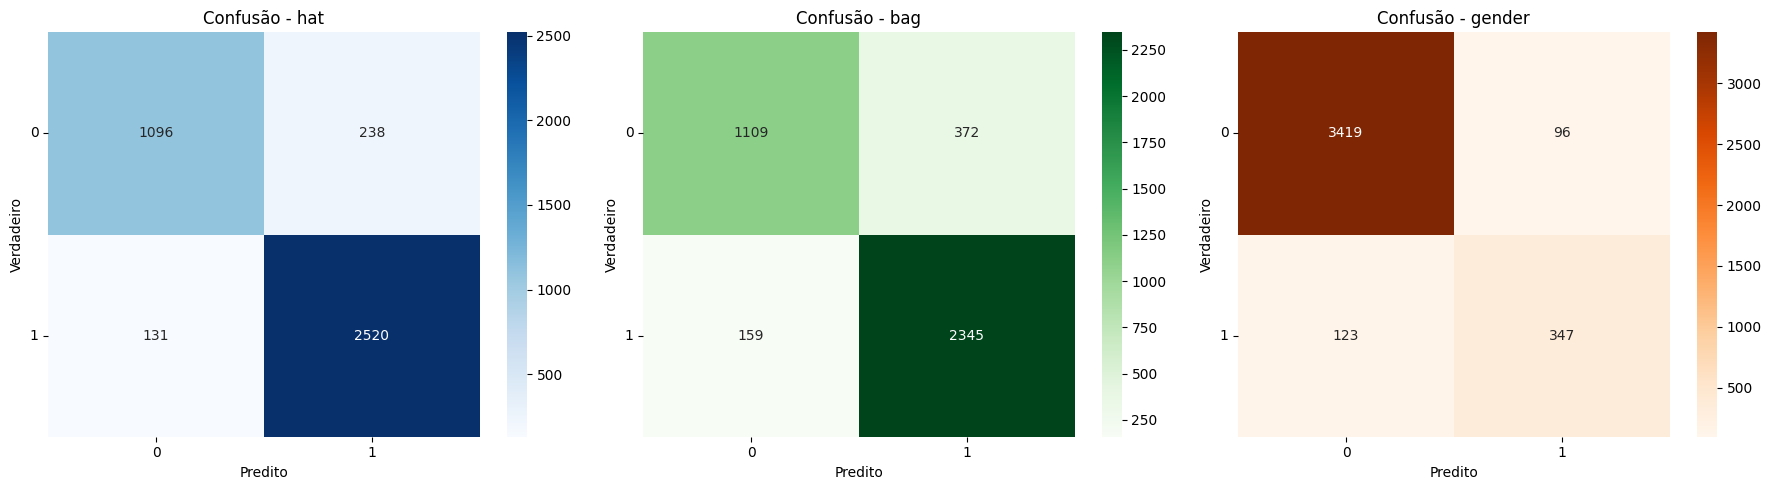

In [ ]:
# Avaliação dos YOLO (hat, bag, gender)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, average_precision_score
from ultralytics import YOLO
import os

base_data = "/content/yolo_attrs_cls"

hat_model_path = os.path.join("runs/attrs_hat/yolov8n-cls-hat-lowmem", "weights", "best.pt")
bag_model_path = os.path.join("runs/attrs_bag/yolov8n-cls-bag-lowmem", "weights", "best.pt")
gender_model_path = os.path.join("runs/attrs_gender/yolov8n-cls-gender-lowmem", "weights", "best.pt")

model_hat = YOLO(hat_model_path)
model_bag = YOLO(bag_model_path)
model_gender = YOLO(gender_model_path)


def list_images_cls(root):
    test_dir = os.path.join(root, 'test')
    classes = sorted(next(os.walk(test_dir))[1])
    items = []
    for cls in classes:
        cls_dir = os.path.join(test_dir, cls)
        for fn in os.listdir(cls_dir):
            if fn.lower().endswith(('.jpg', '.jpeg', '.png')):
                items.append((os.path.join(cls_dir, fn), cls))
    return items, classes


def eval_split(items, model, classes):
    y_true = []
    y_pred = []
    y_scores = []
    for path, cls in items:
        res = model.predict(path, verbose=False)
        probs = res[0].probs.data.cpu().numpy()
        pred_idx = int(np.argmax(probs))
        y_pred.append(pred_idx)
        y_true.append(classes.index(cls))
        y_scores.append(probs)
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_scores = np.stack(y_scores, axis=0)

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
    report = classification_report(y_true, y_pred, target_names=classes, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    maps = []
    for c in range(len(classes)):
        y_true_bin = (y_true == c).astype(int)
        y_score_c = y_scores[:, c]
        try:
            ap = average_precision_score(y_true_bin, y_score_c)
        except Exception:
            ap = 0.0
        maps.append(ap)
    map_macro = float(np.mean(maps))

    return {"acc": acc, "prec": prec, "rec": rec, "f1": f1, "report": report, "cm": cm, "map": map_macro}

hat_items, hat_classes = list_images_cls(os.path.join(base_data, "hat"))
bag_items, bag_classes = list_images_cls(os.path.join(base_data, "bag"))
gender_items, gender_classes = list_images_cls(os.path.join(base_data, "gender"))

print("Avaliando HAT...")
hat_metrics = eval_split(hat_items, model_hat, hat_classes)
print("Avaliando BAG...")
bag_metrics = eval_split(bag_items, model_bag, bag_classes)
print("Avaliando GENDER...")
gender_metrics = eval_split(gender_items, model_gender, gender_classes)

metrics_df = pd.DataFrame([
    {"Atributo": "hat", "Accuracy": hat_metrics['acc'], "Precision": hat_metrics['prec'], "Recall": hat_metrics['rec'], "F1-score": hat_metrics['f1'], "mAP": hat_metrics['map']},
    {"Atributo": "bag", "Accuracy": bag_metrics['acc'], "Precision": bag_metrics['prec'], "Recall": bag_metrics['rec'], "F1-score": bag_metrics['f1'], "mAP": bag_metrics['map']},
    {"Atributo": "gender", "Accuracy": gender_metrics['acc'], "Precision": gender_metrics['prec'], "Recall": gender_metrics['rec'], "F1-score": gender_metrics['f1'], "mAP": gender_metrics['map']},
])
print("\n📊 MÉTRICAS GERAIS (YOLO atributos):")
print(metrics_df)

print("\nRelatório - HAT\n", hat_metrics['report'])
print("\nRelatório - BAG\n", bag_metrics['report'])
print("\nRelatório - GENDER\n", gender_metrics['report'])

fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.heatmap(hat_metrics['cm'], annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusão - hat')
axes[0].set_xlabel('Predito')
axes[0].set_ylabel('Verdadeiro')
axes[0].set_xticklabels(hat_classes, rotation=0)
axes[0].set_yticklabels(hat_classes, rotation=0)

sns.heatmap(bag_metrics['cm'], annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusão - bag')
axes[1].set_xlabel('Predito')
axes[1].set_ylabel('Verdadeiro')
axes[1].set_xticklabels(bag_classes, rotation=0)
axes[1].set_yticklabels(bag_classes, rotation=0)

sns.heatmap(gender_metrics['cm'], annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title('Confusão - gender')
axes[2].set_xlabel('Predito')
axes[2].set_ylabel('Verdadeiro')
axes[2].set_xticklabels(gender_classes, rotation=0)
axes[2].set_yticklabels(gender_classes, rotation=0)

plt.tight_layout()
plt.show()

## EfficientNetB0

In [ ]:
# PIPELINE FINAL - EFFICIENTNETB0
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
from PIL import Image
import pandas as pd
import os
import gc

# CONFIGURAÇÕES
IMG_DIR = "/content/training_set_extracted/training_set"
IMG_SIZE = (224, 224)
BATCH_SIZE = 8
chunk_size = 5000
EPOCHS = 5
device = "cuda" if torch.cuda.is_available() else "cpu"

# CSV E MAPEAMENTO
labels_df = pd.read_csv("/content/training_set_extracted/training_set_balanced.txt")
labels_df["filepath"] = labels_df["filename"].apply(lambda x: os.path.join(IMG_DIR, x))

top_mapping = {cls: i for i, cls in enumerate(sorted(labels_df["top_color"].unique()))}
bottom_mapping = {cls: i for i, cls in enumerate(sorted(labels_df["bottom_color"].unique()))}

labels_df["top_color_idx"] = labels_df["top_color"].map(top_mapping)
labels_df["bottom_color_idx"] = labels_df["bottom_color"].map(bottom_mapping)

NUM_COLORS_TOP = len(top_mapping)
NUM_COLORS_BOTTOM = len(bottom_mapping)

val_split = int(len(labels_df) * 0.05)
val_df = labels_df.sample(val_split, random_state=42)
train_df = labels_df.drop(val_df.index)

# DATASET
class ClothingDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        img = Image.open(row["filepath"]).convert("RGB")
        if self.transform:
            img = self.transform(img)

        hat = torch.tensor(row["hat"], dtype=torch.float32)
        bag = torch.tensor(row["bag"], dtype=torch.float32)
        gender = torch.tensor(row["gender"], dtype=torch.long)
        top = torch.tensor(row["top_color_idx"], dtype=torch.long)
        bottom = torch.tensor(row["bottom_color_idx"], dtype=torch.long)

        return img, hat, bag, gender, top, bottom

# TRANSFORMS CORRIGIDOS
weights = EfficientNet_B0_Weights.IMAGENET1K_V1
transform = weights.transforms()     # ✅ usa pipeline oficial SEM duplicações

val_dataset = ClothingDataset(val_df, transform)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# MODELO EfficientNetB0 MULTITASK
class EfficientNetB0MultiTask(nn.Module):
    def __init__(self, num_top, num_bottom):
        super().__init__()

        self.base = efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)

        # Congelar backbone
        for param in self.base.parameters():
            param.requires_grad = False

        # Remover top original
        in_features = self.base.classifier[1].in_features
        self.base.classifier = nn.Identity()

        # Cabeças multitask
        self.hat = nn.Linear(in_features, 1)
        self.bag = nn.Linear(in_features, 1)
        self.gender = nn.Linear(in_features, 2)
        self.top_color = nn.Linear(in_features, num_top)
        self.bottom_color = nn.Linear(in_features, num_bottom)

    def forward(self, x):
        feats = self.base(x)
        return (
            torch.sigmoid(self.hat(feats)),
            torch.sigmoid(self.bag(feats)),
            self.gender(feats),
            self.top_color(feats),
            self.bottom_color(feats)
        )

model = EfficientNetB0MultiTask(NUM_COLORS_TOP, NUM_COLORS_BOTTOM).to(device)

# LOSSES / OPTIMIZER
optimizer = optim.Adam(model.parameters(), lr=1e-4)
bce = nn.BCELoss()
ce = nn.CrossEntropyLoss()

# LOOP DE TREINO E VALIDAÇÃO
def train_one_epoch(loader):
    model.train()
    running_loss = 0

    for batch in loader:
        imgs, hat, bag, gender, top, bottom = batch

        imgs = imgs.to(device)
        hat = hat.to(device)
        bag = bag.to(device)
        gender = gender.to(device)
        top = top.to(device)
        bottom = bottom.to(device)

        optimizer.zero_grad()

        o_hat, o_bag, o_gender, o_top, o_bottom = model(imgs)

        loss = (
            bce(o_hat.squeeze(), hat) +
            bce(o_bag.squeeze(), bag) +
            ce(o_gender, gender) +
            ce(o_top, top) +
            ce(o_bottom, bottom)
        )

        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    return running_loss / len(loader)

def validate():
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            imgs, hat, bag, gender, top, bottom = batch

            imgs = imgs.to(device)
            hat = hat.to(device)
            bag = bag.to(device)
            gender = gender.to(device)
            top = top.to(device)
            bottom = bottom.to(device)

            o_hat, o_bag, o_gender, o_top, o_bottom = model(imgs)

            loss = (
                bce(o_hat.squeeze(), hat) +
                bce(o_bag.squeeze(), bag) +
                ce(o_gender, gender) +
                ce(o_top, top) +
                ce(o_bottom, bottom)
            )
            total_loss += loss.item()

    return total_loss / len(val_loader)

# TREINO POR CHUNKS
for epoch in range(EPOCHS):
    print(f"\n========================")
    print(f"EPOCH {epoch+1}/{EPOCHS} — Treinando todos os chunks")
    print(f"========================")

    for start in range(0, len(train_df), chunk_size):
        end = start + chunk_size
        subset_df = train_df.iloc[start:end]

        print(f"\n🔹 Treinando chunk {start} até {end}... ({len(subset_df)} exemplos)")

        train_dataset = ClothingDataset(subset_df, transform)
        train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

        train_loss = train_one_epoch(train_loader)
        val_loss = validate()

        print(f"Loss treino: {train_loss:.4f} | Loss validação: {val_loss:.4f}")

        del train_dataset, train_loader
        gc.collect()

# SALVAR MODELO
torch.save(model.state_dict(), "efficientnetb0_multitask.pt")
print(" Modelo EfficientNetB0 multitask salvo como efficientnetb0_multitask.pt")


In [ ]:
# PIPELINE - EFFICIENTNETB0 (VERSÃO 1.0)
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.callbacks import LambdaCallback, ReduceLROnPlateau, ModelCheckpoint
import pandas as pd
import os
import gc

# CONFIGURAÇÕES
IMG_DIR = "/content/training_set_extracted/training_set"
IMG_SIZE = (224, 224)
BATCH_SIZE = 8
chunk_size = 5000
EPOCHS_PER_CHUNK = 5

# CARREGAR CSV E PATHS
labels_df = pd.read_csv("/content/training_set_extracted/training_set_balanced.txt")
labels_df["filepath"] = labels_df["filename"].apply(lambda x: os.path.join(IMG_DIR, x))

# MAPEAMENTO GLOBAL
top_mapping = {cls: i for i, cls in enumerate(sorted(labels_df["top_color"].unique()))}
bottom_mapping = {cls: i for i, cls in enumerate(sorted(labels_df["bottom_color"].unique()))}
labels_df["top_color_idx"] = labels_df["top_color"].map(top_mapping)
labels_df["bottom_color_idx"] = labels_df["bottom_color"].map(bottom_mapping)

NUM_COLORS_TOP = len(top_mapping)
NUM_COLORS_BOTTOM = len(bottom_mapping)

# DIVISÃO GLOBAL
val_split = int(len(labels_df) * 0.05)
val_df = labels_df.sample(val_split, random_state=42)
train_df = labels_df.drop(val_df.index)

# DATASET
def process_row(filepath, hat, bag, gender, top_color, bottom_color):
    img = tf.io.read_file(filepath)
    img = tf.io.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.resize(img, IMG_SIZE)
    img = preprocess_input(img)  # normalização específica do EfficientNet

    labels = {
        "hat": tf.cast(hat, tf.float32),
        "bag": tf.cast(bag, tf.float32),
        "gender": tf.one_hot(gender, depth=2),
        "top_color": tf.one_hot(top_color, depth=NUM_COLORS_TOP),
        "bottom_color": tf.one_hot(bottom_color, depth=NUM_COLORS_BOTTOM),
    }
    return img, labels

def make_dataset(df, is_training=True):
    ds = tf.data.Dataset.from_tensor_slices((
        df["filepath"].values,
        df["hat"].values,
        df["bag"].values,
        df["gender"].values,
        df["top_color_idx"].values,
        df["bottom_color_idx"].values
    ))
    ds = ds.map(process_row, num_parallel_calls=tf.data.AUTOTUNE)
    if is_training:
        ds = ds.shuffle(buffer_size=min(len(df), 2000))
    ds = ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return ds

val_ds = make_dataset(val_df, is_training=False)

# MODELO
base_model = EfficientNetB0(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False
for layer in base_model.layers:
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = False

inputs = layers.Input(shape=IMG_SIZE + (3,))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)

hat_output = layers.Dense(1, activation='sigmoid', name='hat')(x)
bag_output = layers.Dense(1, activation='sigmoid', name='bag')(x)
gender_output = layers.Dense(2, activation='softmax', name='gender')(x)
top_color_output = layers.Dense(NUM_COLORS_TOP, activation='softmax', name='top_color')(x)
bottom_color_output = layers.Dense(NUM_COLORS_BOTTOM, activation='softmax', name='bottom_color')(x)

model = models.Model(
    inputs=inputs,
    outputs=[hat_output, bag_output, gender_output, top_color_output, bottom_color_output]
)

# COMPILE
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss={
        'hat': 'binary_crossentropy',
        'bag': 'binary_crossentropy',
        'gender': 'categorical_crossentropy',
        'top_color': 'categorical_crossentropy',
        'bottom_color': 'categorical_crossentropy'
    },
    metrics={
        'hat': 'accuracy',
        'bag': 'accuracy',
        'gender': 'accuracy',
        'top_color': tf.keras.metrics.TopKCategoricalAccuracy(k=3),
        'bottom_color': tf.keras.metrics.TopKCategoricalAccuracy(k=3)
    }
)

# CALLBACKS
callbacks = [
    LambdaCallback(on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}: {logs}")),
    ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=2, verbose=1),
    ModelCheckpoint("efficientnetb0_chunk_weights.h5", save_best_only=True, monitor='val_loss', mode='min')
]

# TREINO POR CHUNKS
EPOCHS = 5  # total de epochs sobre toda a base

for epoch in range(EPOCHS):
    print(f"\n========================")
    print(f"EPOCH {epoch + 1}/{EPOCHS} — Treinando todos os chunks")
    print(f"========================")

    for start in range(0, len(train_df), chunk_size):
        end = start + chunk_size
        subset_df = train_df.iloc[start:end]

        print(f"\n🔹 Treinando chunk {start} até {end}... ({len(subset_df)} exemplos)")

        train_ds_chunk = make_dataset(subset_df, is_training=True)

        model.fit(
            train_ds_chunk,
            validation_data=val_ds,
            epochs=1,
            callbacks=callbacks,
            verbose=1
        )

        del train_ds_chunk
        gc.collect()

# (opcional) Fine-tuning leve:
# base_model.trainable = True
# for layer in base_model.layers[:-40]:
#     layer.trainable = False
# model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), ...)

# SALVAR MODELO COMPLETO E PESOS
full_model_path = "efficientnetb0_model.keras"
model.save(full_model_path)
print(f"Modelo completo salvo em: {full_model_path}")

weights_path = "efficientnetb0_final.weights.h5"
model.save_weights(weights_path)
print(f"Pesos do modelo salvos em: {weights_path}")



EPOCH 1/5 — Treinando todos os chunks

🔹 Treinando chunk 0 até 5000... (5000 exemplos)
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - bag_accuracy: 0.6941 - bag_loss: 0.5915 - bottom_color_loss: 2.0521 - bottom_color_top_k_categorical_accuracy: 0.5851 - gender_accuracy: 0.6559 - gender_loss: 0.6157 - hat_accuracy: 0.8023 - hat_loss: 0.4500 - loss: 5.6950 - top_color_loss: 1.9856 - top_color_top_k_categorical_accuracy: 0.5818

Epoch 1: {'bag_accuracy': 0.7540000081062317, 'bag_loss': 0.5237407684326172, 'bottom_color_loss': 1.7374886274337769, 'bottom_color_top_k_categorical_accuracy': 0.7202000021934509, 'gender_accuracy': 0.6985999941825867, 'gender_loss': 0.5781859159469604, 'hat_accuracy': 0.8632000088691711, 'hat_loss': 0.3415776193141937, 'loss': 4.880198955535889, 'top_color_loss': 1.6992064714431763, 'top_color_top_k_categorical_accuracy': 0.698199987411499, 'val_bag_accuracy': 0.6254709959030151, 'val_bag_loss': 0.6600745916366577, 'val_bottom_color_loss': 1.755239486694336, 'val_bottom_color_top_k_categorical_accuracy': 0.7573474049568176, 'val_gender_accuracy': 0.7430294156074524, 'val_gender_loss': 0.5426564812660217, 'val_hat_accuracy': 0.6819894313812256, 'val_hat_loss': 0.5304168462753296, 'val_loss': 5.499038219451904, 'val_top_color_loss': 2.0110747814178467, 'val_top_color_top_k_categorical_accuracy': 0.5810098052024841}
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 43ms/step - bag_accuracy: 0.6943 - ba

Epoch 1: {'bag_accuracy': 0.8754000067710876, 'bag_loss': 0.30951905250549316, 'bottom_color_loss': 1.068432092666626, 'bottom_color_top_k_categorical_accuracy': 0.9228000044822693, 'gender_accuracy': 0.8953999876976013, 'gender_loss': 0.2653311491012573, 'hat_accuracy': 0.8651999831199646, 'hat_loss': 0.352191299200058, 'loss': 2.797989845275879, 'top_color_loss': 0.8025196194648743, 'top_color_top_k_categorical_accuracy': 0.8917999863624573, 'val_bag_accuracy': 0.5990957021713257, 'val_bag_loss': 0.9227488040924072, 'val_bottom_color_loss': 1.5519863367080688, 'val_bottom_color_top_k_categorical_accuracy': 0.835719645023346, 'val_gender_accuracy': 0.9223812818527222, 'val_gender_loss': 0.22205187380313873, 'val_hat_accuracy': 0.7754333019256592, 'val_hat_loss': 0.45710018277168274, 'val_loss': 5.372865676879883, 'val_top_color_loss': 2.2194364070892334, 'val_top_color_top_k_categorical_accuracy': 0.6993218064308167}
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - bag_accuracy: 0.8223 - 

Epoch 1: {'bag_accuracy': 0.8205999732017517, 'bag_loss': 0.4129447340965271, 'bottom_color_loss': 0.8423212766647339, 'bottom_color_top_k_categorical_accuracy': 0.9517999887466431, 'gender_accuracy': 0.9983999729156494, 'gender_loss': 0.030484769493341446, 'hat_accuracy': 0.8748000264167786, 'hat_loss': 0.34320709109306335, 'loss': 2.90193247795105, 'top_color_loss': 1.272972822189331, 'top_color_top_k_categorical_accuracy': 0.8181999921798706, 'val_bag_accuracy': 0.6209495067596436, 'val_bag_loss': 0.7462650537490845, 'val_bottom_color_loss': 1.6028591394424438, 'val_bottom_color_top_k_categorical_accuracy': 0.777694046497345, 'val_gender_accuracy': 0.8899773955345154, 'val_gender_loss': 0.36058226227760315, 'val_hat_accuracy': 0.8394875526428223, 'val_hat_loss': 0.38338765501976013, 'val_loss': 5.088564872741699, 'val_top_color_loss': 1.9959347248077393, 'val_top_color_top_k_categorical_accuracy': 0.5320271253585815}
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - bag_accuracy: 0.8713 

Epoch 1: {'bag_accuracy': 0.8069999814033508, 'bag_loss': 0.4482184946537018, 'bottom_color_loss': 0.6545407176017761, 'bottom_color_top_k_categorical_accuracy': 0.9789999723434448, 'gender_accuracy': 1.0, 'gender_loss': 0.002853400306776166, 'hat_accuracy': 0.8754000067710876, 'hat_loss': 0.3139376640319824, 'loss': 1.985938310623169, 'top_color_loss': 0.566387414932251, 'top_color_top_k_categorical_accuracy': 0.9458000063896179, 'val_bag_accuracy': 0.6518462896347046, 'val_bag_loss': 0.6106085777282715, 'val_bottom_color_loss': 1.5241551399230957, 'val_bottom_color_top_k_categorical_accuracy': 0.8417482972145081, 'val_gender_accuracy': 0.8899773955345154, 'val_gender_loss': 0.4200347661972046, 'val_hat_accuracy': 0.7302185297012329, 'val_hat_loss': 0.47347742319107056, 'val_loss': 4.606070041656494, 'val_top_color_loss': 1.5778554677963257, 'val_top_color_top_k_categorical_accuracy': 0.8100979924201965}
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - bag_accuracy: 0.7716 - bag_loss: 0.5

Epoch 1: {'bag_accuracy': 0.7202000021934509, 'bag_loss': 0.5164934992790222, 'bottom_color_loss': 1.5742565393447876, 'bottom_color_top_k_categorical_accuracy': 0.7386000156402588, 'gender_accuracy': 0.9998000264167786, 'gender_loss': 0.003509803442284465, 'hat_accuracy': 0.8906000256538391, 'hat_loss': 0.32324516773223877, 'loss': 3.3967769145965576, 'top_color_loss': 0.9792697429656982, 'top_color_top_k_categorical_accuracy': 0.9047999978065491, 'val_bag_accuracy': 0.616428017616272, 'val_bag_loss': 0.6332951188087463, 'val_bottom_color_loss': 1.1653255224227905, 'val_bottom_color_top_k_categorical_accuracy': 0.8899773955345154, 'val_gender_accuracy': 0.8892238140106201, 'val_gender_loss': 0.4901745915412903, 'val_hat_accuracy': 0.8862094879150391, 'val_hat_loss': 0.3484252691268921, 'val_loss': 3.7848217487335205, 'val_top_color_loss': 1.1471198797225952, 'val_top_color_top_k_categorical_accuracy': 0.8507912755012512}
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - bag_accuracy: 0.749

Epoch 1: {'bag_accuracy': 0.649350643157959, 'bag_loss': 0.630773663520813, 'bottom_color_loss': 1.8102023601531982, 'bottom_color_top_k_categorical_accuracy': 0.6450216174125671, 'gender_accuracy': 1.0, 'gender_loss': 0.0016760416328907013, 'hat_accuracy': 0.9047619104385376, 'hat_loss': 0.24921554327011108, 'loss': 4.006218910217285, 'top_color_loss': 1.3142319917678833, 'top_color_top_k_categorical_accuracy': 0.9307359457015991, 'val_bag_accuracy': 0.6224566698074341, 'val_bag_loss': 0.6292994022369385, 'val_bottom_color_loss': 1.1718568801879883, 'val_bottom_color_top_k_categorical_accuracy': 0.8884702324867249, 'val_gender_accuracy': 0.8892238140106201, 'val_gender_loss': 0.4927532374858856, 'val_hat_accuracy': 0.8854559063911438, 'val_hat_loss': 0.3418850004673004, 'val_loss': 3.7472591400146484, 'val_top_color_loss': 1.1112220287322998, 'val_top_color_top_k_categorical_accuracy': 0.8590806126594543}
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 480ms/step - bag_accuracy: 0.6252 - bag_loss: 0.6

Epoch 1: {'bag_accuracy': 0.7662000060081482, 'bag_loss': 0.48669737577438354, 'bottom_color_loss': 1.3698985576629639, 'bottom_color_top_k_categorical_accuracy': 0.8325999975204468, 'gender_accuracy': 0.7585999965667725, 'gender_loss': 0.5341187715530396, 'hat_accuracy': 0.8866000175476074, 'hat_loss': 0.2899276614189148, 'loss': 3.9466586112976074, 'top_color_loss': 1.2660166025161743, 'top_color_top_k_categorical_accuracy': 0.8190000057220459, 'val_bag_accuracy': 0.7897512912750244, 'val_bag_loss': 0.471686452627182, 'val_bottom_color_loss': 1.2051666975021362, 'val_bottom_color_top_k_categorical_accuracy': 0.8824415802955627, 'val_gender_accuracy': 0.9050489664077759, 'val_gender_loss': 0.2736304998397827, 'val_hat_accuracy': 0.8779200911521912, 'val_hat_loss': 0.30282965302467346, 'val_loss': 3.317321300506592, 'val_top_color_loss': 1.064391851425171, 'val_top_color_top_k_categorical_accuracy': 0.8982667922973633}
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - bag_accuracy: 0.6952 -

Epoch 1: {'bag_accuracy': 0.8838000297546387, 'bag_loss': 0.32608839869499207, 'bottom_color_loss': 0.556488573551178, 'bottom_color_top_k_categorical_accuracy': 0.9883999824523926, 'gender_accuracy': 1.0, 'gender_loss': 0.0021882683504372835, 'hat_accuracy': 0.894599974155426, 'hat_loss': 0.27863752841949463, 'loss': 1.5593101978302002, 'top_color_loss': 0.3959071934223175, 'top_color_top_k_categorical_accuracy': 0.9688000082969666, 'val_bag_accuracy': 0.7739261388778687, 'val_bag_loss': 0.4675105810165405, 'val_bottom_color_loss': 1.135450005531311, 'val_bottom_color_top_k_categorical_accuracy': 0.8605877757072449, 'val_gender_accuracy': 0.8914845585823059, 'val_gender_loss': 0.3613942265510559, 'val_hat_accuracy': 0.8636021018028259, 'val_hat_loss': 0.315550297498703, 'val_loss': 3.2693986892700195, 'val_top_color_loss': 0.9895108938217163, 'val_top_color_top_k_categorical_accuracy': 0.9035418033599854}
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - bag_accuracy: 0.8721 - bag_loss: 0.

Epoch 1: {'bag_accuracy': 0.7663999795913696, 'bag_loss': 0.467456191778183, 'bottom_color_loss': 1.3402855396270752, 'bottom_color_top_k_categorical_accuracy': 0.8095999956130981, 'gender_accuracy': 1.0, 'gender_loss': 0.0031832328531891108, 'hat_accuracy': 0.9156000018119812, 'hat_loss': 0.27408233284950256, 'loss': 2.6772453784942627, 'top_color_loss': 0.5922360420227051, 'top_color_top_k_categorical_accuracy': 0.9635999798774719, 'val_bag_accuracy': 0.7309721112251282, 'val_bag_loss': 0.5225752592086792, 'val_bottom_color_loss': 0.9620117545127869, 'val_bottom_color_top_k_categorical_accuracy': 0.9216277599334717, 'val_gender_accuracy': 0.8899773955345154, 'val_gender_loss': 0.43216070532798767, 'val_hat_accuracy': 0.897513210773468, 'val_hat_loss': 0.29448091983795166, 'val_loss': 3.0279016494750977, 'val_top_color_loss': 0.8161238431930542, 'val_top_color_top_k_categorical_accuracy': 0.9073097109794617}
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - bag_accuracy: 0.7956 - bag_loss:

Epoch 1: {'bag_accuracy': 0.6623376607894897, 'bag_loss': 0.5934333205223083, 'bottom_color_loss': 1.7079453468322754, 'bottom_color_top_k_categorical_accuracy': 0.6883116960525513, 'gender_accuracy': 1.0, 'gender_loss': 0.0013633969938382506, 'hat_accuracy': 0.9134199023246765, 'hat_loss': 0.22101396322250366, 'loss': 3.4855105876922607, 'top_color_loss': 0.9604343175888062, 'top_color_top_k_categorical_accuracy': 0.9740259647369385, 'val_bag_accuracy': 0.7249434590339661, 'val_bag_loss': 0.5239227414131165, 'val_bottom_color_loss': 0.961560070514679, 'val_bottom_color_top_k_categorical_accuracy': 0.9171062707901001, 'val_gender_accuracy': 0.8899773955345154, 'val_gender_loss': 0.4343845546245575, 'val_hat_accuracy': 0.8960060477256775, 'val_hat_loss': 0.29140305519104004, 'val_loss': 3.0076496601104736, 'val_top_color_loss': 0.7960218787193298, 'val_top_color_top_k_categorical_accuracy': 0.9155991077423096}
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - bag_accuracy: 0.6811 - bag_loss: 0

Epoch 1: {'bag_accuracy': 0.7788000106811523, 'bag_loss': 0.4671373665332794, 'bottom_color_loss': 1.2221221923828125, 'bottom_color_top_k_categorical_accuracy': 0.8614000082015991, 'gender_accuracy': 0.7770000100135803, 'gender_loss': 0.4816356301307678, 'hat_accuracy': 0.8944000005722046, 'hat_loss': 0.2715592384338379, 'loss': 3.5339889526367188, 'top_color_loss': 1.0915331840515137, 'top_color_top_k_categorical_accuracy': 0.8610000014305115, 'val_bag_accuracy': 0.8229088187217712, 'val_bag_loss': 0.4064783751964569, 'val_bottom_color_loss': 1.0241988897323608, 'val_bottom_color_top_k_categorical_accuracy': 0.914091944694519, 'val_gender_accuracy': 0.9382064938545227, 'val_gender_loss': 0.18500836193561554, 'val_hat_accuracy': 0.8816879987716675, 'val_hat_loss': 0.2807343006134033, 'val_loss': 2.7119314670562744, 'val_top_color_loss': 0.8156422972679138, 'val_top_color_top_k_categorical_accuracy': 0.9261491894721985}
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - bag_accuracy: 0.7236 

Epoch 1: {'bag_accuracy': 0.6753246784210205, 'bag_loss': 0.5923100709915161, 'bottom_color_loss': 1.618517279624939, 'bottom_color_top_k_categorical_accuracy': 0.709956705570221, 'gender_accuracy': 1.0, 'gender_loss': 0.0012670062715187669, 'hat_accuracy': 0.939393937587738, 'hat_loss': 0.21258434653282166, 'loss': 3.220930576324463, 'top_color_loss': 0.7938081622123718, 'top_color_top_k_categorical_accuracy': 0.9783549904823303, 'val_bag_accuracy': 0.7633760571479797, 'val_bag_loss': 0.4766084551811218, 'val_bottom_color_loss': 0.8717583417892456, 'val_bottom_color_top_k_categorical_accuracy': 0.9238884449005127, 'val_gender_accuracy': 0.8907309770584106, 'val_gender_loss': 0.39728230237960815, 'val_hat_accuracy': 0.8997739553451538, 'val_hat_loss': 0.27395597100257874, 'val_loss': 2.690080404281616, 'val_top_color_loss': 0.6700795292854309, 'val_top_color_top_k_categorical_accuracy': 0.9321778416633606}
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - bag_accuracy: 0.7257 - bag_loss: 0.55

Epoch 1: {'bag_accuracy': 0.7879999876022339, 'bag_loss': 0.456845760345459, 'bottom_color_loss': 1.132859706878662, 'bottom_color_top_k_categorical_accuracy': 0.881600022315979, 'gender_accuracy': 0.7850000262260437, 'gender_loss': 0.4638114869594574, 'hat_accuracy': 0.8970000147819519, 'hat_loss': 0.2596106231212616, 'loss': 3.3130617141723633, 'top_color_loss': 0.9999353289604187, 'top_color_top_k_categorical_accuracy': 0.8773999810218811, 'val_bag_accuracy': 0.8236624002456665, 'val_bag_loss': 0.38033753633499146, 'val_bottom_color_loss': 0.9280592203140259, 'val_bottom_color_top_k_categorical_accuracy': 0.9291635155677795, 'val_gender_accuracy': 0.938960075378418, 'val_gender_loss': 0.17085304856300354, 'val_hat_accuracy': 0.8854559063911438, 'val_hat_loss': 0.2695426344871521, 'val_loss': 2.4452831745147705, 'val_top_color_loss': 0.6964403390884399, 'val_top_color_top_k_categorical_accuracy': 0.9397136569023132}
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - bag_accuracy: 0.7356 - 

Epoch 1: {'bag_accuracy': 0.7947999835014343, 'bag_loss': 0.44920045137405396, 'bottom_color_loss': 1.0582226514816284, 'bottom_color_top_k_categorical_accuracy': 0.8942000269889832, 'gender_accuracy': 0.7975999712944031, 'gender_loss': 0.44338592886924744, 'hat_accuracy': 0.9034000039100647, 'hat_loss': 0.24954423308372498, 'loss': 3.127110481262207, 'top_color_loss': 0.9267566204071045, 'top_color_top_k_categorical_accuracy': 0.8948000073432922, 'val_bag_accuracy': 0.8296910524368286, 'val_bag_loss': 0.36202582716941833, 'val_bottom_color_loss': 0.8657889366149902, 'val_bottom_color_top_k_categorical_accuracy': 0.9412208199501038, 'val_gender_accuracy': 0.9382064938545227, 'val_gender_loss': 0.17118729650974274, 'val_hat_accuracy': 0.8899773955345154, 'val_hat_loss': 0.26239341497421265, 'val_loss': 2.29805588722229, 'val_top_color_loss': 0.6365601420402527, 'val_top_color_top_k_categorical_accuracy': 0.9464958310127258}
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - bag_accuracy: 0.74

## Validação

ATENÇÃO, VERIFICAR NOMES DOS MODELOS SALVOS

In [ ]:
#LINK PARA A PARTE DE VALIDAÇÃO DA BASE
#https://drive.google.com/file/d/1HS7TCHJ6p6CDxe6vccgGzmx7gDxnaYCT/view?usp=sharing

In [ ]:
import gdown
import zipfile
import os

# CONFIGURAÇÃO
drive_file_id = "1HS7TCHJ6p6CDxe6vccgGzmx7gDxnaYCT"
zip_name = "PAR2025_val.zip"
extract_dir = "PAR2025_val"

# DOWNLOAD DO DRIVE
gdown.download(f"https://drive.google.com/uc?id={drive_file_id}", zip_name, quiet=False)

# EXTRAIR ZIP PRINCIPAL
with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Arquivos do primeiro zip extraídos em: {extract_dir}")
print(os.listdir(extract_dir))

# EXTRAIR ZIP INTERNO
inner_zip_path = os.path.join(extract_dir, "PAR2025", "validation_set.zip")
inner_extract_dir = os.path.join(extract_dir, "validation_set")

with zipfile.ZipFile(inner_zip_path, 'r') as zip_ref:
    zip_ref.extractall(inner_extract_dir)

print(f"Segundo zip extraído em: {inner_extract_dir}")
print(os.listdir(inner_extract_dir))

txt_path = os.path.join(extract_dir, "PAR2025", "validation_set.txt")
print(f"TXT de labels disponível em: {txt_path}")


Downloading...
From (original): https://drive.google.com/uc?id=1HS7TCHJ6p6CDxe6vccgGzmx7gDxnaYCT
From (redirected): https://drive.google.com/uc?id=1HS7TCHJ6p6CDxe6vccgGzmx7gDxnaYCT&confirm=t&uuid=76e33aa6-0f3b-4b51-8177-709362ab0690
To: /content/PAR2025_val.zip
100%|██████████| 639M/639M [00:05<00:00, 119MB/s]


Arquivos do primeiro zip extraídos em: PAR2025_val
['validation_set', 'PAR2025', 'validation_set.txt', 'validation_set_images']
Segundo zip extraído em: PAR2025_val/validation_set
['validation_set']
TXT de labels disponível em: PAR2025_val/PAR2025/validation_set.txt


In [ ]:
!pip install ultralytics tqdm

import torch.nn as nn
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights, mobilenet_v2
import torch
import torch.nn.functional as F
from ultralytics import YOLO
from torchvision import transforms
from PIL import Image
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import defaultdict
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_recall_fscore_support,
    balanced_accuracy_score,
    confusion_matrix
)

device = "cuda" if torch.cuda.is_available() else "cpu"


# 1. MODELOS MULTITASK (CNN)

class EfficientNetB0MultiTask(nn.Module):
    def __init__(self, num_top, num_bottom):
        super().__init__()
        self.base = efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)
        for p in self.base.parameters(): p.requires_grad = False
        in_features = self.base.classifier[1].in_features
        self.base.classifier = nn.Identity()
        self.hat = nn.Linear(in_features, 1)
        self.bag = nn.Linear(in_features, 1)
        self.gender = nn.Linear(in_features, 2)
        self.top_color = nn.Linear(in_features, num_top)
        self.bottom_color = nn.Linear(in_features, num_bottom)

    def forward(self, x):
        f = self.base(x)
        return (
            torch.sigmoid(self.hat(f)),
            torch.sigmoid(self.bag(f)),
            self.gender(f),
            self.top_color(f),
            self.bottom_color(f)
        )


class MobileNetV2MultiTask(nn.Module):
    def __init__(self, num_top, num_bottom):
        super().__init__()
        self.base = mobilenet_v2(weights="IMAGENET1K_V1")
        for p in self.base.parameters(): p.requires_grad = False
        in_features = self.base.classifier[1].in_features
        self.base.classifier = nn.Identity()
        self.hat = nn.Linear(in_features, 1)
        self.bag = nn.Linear(in_features, 1)
        self.gender = nn.Linear(in_features, 2)
        self.top_color = nn.Linear(in_features, num_top)
        self.bottom_color = nn.Linear(in_features, num_bottom)

    def forward(self, x):
        f = self.base(x)
        return (
            torch.sigmoid(self.hat(f)),
            torch.sigmoid(self.bag(f)),
            self.gender(f),
            self.top_color(f),
            self.bottom_color(f)
        )


# 2. CARREGAR MAPEAMENTO CNN (NATURAL)

train_csv = "/content/training_set_extracted/training_set_balanced.txt"
train_df = pd.read_csv(train_csv)

# Mapeamento 'natural' usado no treino das CNNs
cnn_top_map = {i: str(cls) for cls, i in {cls: i for i, cls in enumerate(sorted(train_df["top_color"].unique()))}.items()}
cnn_bottom_map = {i: str(cls) for cls, i in {cls: i for i, cls in enumerate(sorted(train_df["bottom_color"].unique()))}.items()}

NUM_COLORS_TOP = len(cnn_top_map)
NUM_COLORS_BOTTOM = len(cnn_bottom_map)

efficient = EfficientNetB0MultiTask(NUM_COLORS_TOP, NUM_COLORS_BOTTOM).to(device)
efficient.load_state_dict(torch.load("efficientnetb0_multitask.pt", map_location=device))
efficient.eval()

mobilenet = MobileNetV2MultiTask(NUM_COLORS_TOP, NUM_COLORS_BOTTOM).to(device)
mobilenet.load_state_dict(torch.load("mobilenetv2_multitask.pt", map_location=device))
mobilenet.eval()


# 3. CARREGAR OS YOLOs + mappings

yolo_models = {
    "hat": YOLO("/content/best_hat.pt"),
    "bag": YOLO("/content/best_bag.pt"),
    "gender": YOLO("/content/best_gender.pt"),
    "top": YOLO("/content/best_top.pt"),
    "bottom": YOLO("/content/best_bottom.pt"),
}

# YOLO mappings: índice → label (string)
yolo_top_map = yolo_models["top"].names
yolo_bottom_map = yolo_models["bottom"].names

# 4. TRANSFORM

input_tf = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])

# 5. VOTO — AGORA POR LABEL

def weighted_vote_labels(votes):
    scores = defaultdict(float)
    for label, conf in votes:
        scores[label] += conf
    return max(scores, key=scores.get)


def cnn_probs_to_labels_top(probs):
    idx = int(np.argmax(probs))
    return cnn_top_map[idx], float(np.max(probs))


def cnn_probs_to_labels_bottom(probs):
    idx = int(np.argmax(probs))
    return cnn_bottom_map[idx], float(np.max(probs))


def yolo_probs_to_label(probs, mapping):
    idx = int(np.argmax(probs))
    return mapping[idx], float(np.max(probs))

# 6. ENSEMBLE PREDICT

def ensemble_predict(image_path):
    with torch.no_grad():
        img_pil = Image.open(image_path).convert("RGB")
        img_tensor = input_tf(img_pil).unsqueeze(0).to(device)

        # CNNs
        e_hat, e_bag, e_gender, e_top, e_bottom = efficient(img_tensor)
        m_hat, m_bag, m_gender, m_top, m_bottom = mobilenet(img_tensor)

        # YOLOs
        y_hat_probs = yolo_models["hat"](image_path, verbose=False)[0].probs.data.cpu().numpy()
        y_bag_probs = yolo_models["bag"](image_path, verbose=False)[0].probs.data.cpu().numpy()
        y_gender_probs = yolo_models["gender"](image_path, verbose=False)[0].probs.data.cpu().numpy()
        y_top_probs = yolo_models["top"](image_path, verbose=False)[0].probs.data.cpu().numpy()
        y_bottom_probs = yolo_models["bottom"](image_path, verbose=False)[0].probs.data.cpu().numpy()

    # --------------- HAT / BAG / GENDER — BINÁRIO ---------------
    def vote_binary(v1, v2, v3):
        return 1 if (v1 + v2 + v3) >= 1.5 else 0

    hat_final = vote_binary(e_hat.item(), m_hat.item(), y_hat_probs[0])
    bag_final = vote_binary(e_bag.item(), m_bag.item(), y_bag_probs[0])
    gender_final = vote_binary(
        F.softmax(e_gender, dim=-1)[0][1].item(),
        F.softmax(m_gender, dim=-1)[0][1].item(),
        y_gender_probs[1],
    )

    # --------------- TOP COLOR — voto por LABEL ---------------
    votes_top = [
        cnn_probs_to_labels_top(F.softmax(e_top, dim=-1).cpu().numpy()[0]),
        cnn_probs_to_labels_top(F.softmax(m_top, dim=-1).cpu().numpy()[0]),
        yolo_probs_to_label(y_top_probs, yolo_top_map)
    ]
    top_final = weighted_vote_labels(votes_top)

    # --------------- BOTTOM COLOR — voto por LABEL ---------------
    votes_bottom = [
        cnn_probs_to_labels_bottom(F.softmax(e_bottom, dim=-1).cpu().numpy()[0]),
        cnn_probs_to_labels_bottom(F.softmax(m_bottom, dim=-1).cpu().numpy()[0]),
        yolo_probs_to_label(y_bottom_probs, yolo_bottom_map)
    ]
    bottom_final = weighted_vote_labels(votes_bottom)

    return hat_final, bag_final, gender_final, top_final, bottom_final


# 7. VALIDATION SET

IMG_DIR = "/content/PAR2025_val/validation_set/validation_set"
val_csv = "/content/PAR2025_val/PAR2025/validation_set.txt"

val_df = pd.read_csv(val_csv)

if "filename" not in val_df.columns:
    val_df = pd.read_csv(val_csv, header=None)
    val_df.columns = ["filename", "top_color", "bottom_color", "gender", "hat", "bag"]

val_df["filepath"] = val_df["filename"].apply(lambda x: os.path.join(IMG_DIR, x))


# Ground truth para cores → string
val_df["top_color_str"] = val_df["top_color"].astype(str)
val_df["bottom_color_str"] = val_df["bottom_color"].astype(str)


# 8. RODAR ENSEMBLE

pred_hat = []
pred_bag = []
pred_gender = []
pred_top = []
pred_bottom = []

print("Rodando ensemble...")

for _, row in tqdm(val_df.iterrows(), total=len(val_df)):
    h, b, g, t, bt = ensemble_predict(row["filepath"])
    pred_hat.append(h)
    pred_bag.append(b)
    pred_gender.append(g)
    pred_top.append(t)
    pred_bottom.append(bt)


# 9. AVALIAÇÃO

def avaliar(y_true, y_pred, nome):
    print(f"\n===== {nome.upper()} =====")
    print("Acurácia:", accuracy_score(y_true, y_pred))
    print("Balanced Acc:", balanced_accuracy_score(y_true, y_pred))

    print(classification_report(y_true, y_pred, digits=3))
    print(confusion_matrix(y_true, y_pred))

avaliar(val_df["hat"].tolist(), pred_hat, "Hat")
avaliar(val_df["bag"].tolist(), pred_bag, "Bag")
avaliar(val_df["gender"].tolist(), pred_gender, "Gender")
avaliar(val_df["top_color_str"].tolist(), pred_top, "Top Color")
avaliar(val_df["bottom_color_str"].tolist(), pred_bottom, "Bottom Color")


KeyboardInterrupt: 

##VALIDAÇÃO ISOLADA DE MODELOS

In [ ]:
#MOBILENET
!pip install ultralytics tqdm

import torch.nn as nn
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights, mobilenet_v2
import torch
import torch.nn.functional as F
from ultralytics import YOLO
from torchvision import transforms
from PIL import Image
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import defaultdict
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_recall_fscore_support,
    balanced_accuracy_score,
    confusion_matrix
)

device = "cuda" if torch.cuda.is_available() else "cpu"


# 1. MODELOS MULTITASK (CNN)

class EfficientNetB0MultiTask(nn.Module):
    def __init__(self, num_top, num_bottom):
        super().__init__()
        self.base = efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)
        for p in self.base.parameters(): p.requires_grad = False
        in_features = self.base.classifier[1].in_features
        self.base.classifier = nn.Identity()
        self.hat = nn.Linear(in_features, 1)
        self.bag = nn.Linear(in_features, 1)
        self.gender = nn.Linear(in_features, 2)
        self.top_color = nn.Linear(in_features, num_top)
        self.bottom_color = nn.Linear(in_features, num_bottom)

    def forward(self, x):
        f = self.base(x)
        return (
            torch.sigmoid(self.hat(f)),
            torch.sigmoid(self.bag(f)),
            self.gender(f),
            self.top_color(f),
            self.bottom_color(f)
        )


class MobileNetV2MultiTask(nn.Module):
    def __init__(self, num_top, num_bottom):
        super().__init__()
        self.base = mobilenet_v2(weights="IMAGENET1K_V1")
        for p in self.base.parameters(): p.requires_grad = False
        in_features = self.base.classifier[1].in_features
        self.base.classifier = nn.Identity()
        self.hat = nn.Linear(in_features, 1)
        self.bag = nn.Linear(in_features, 1)
        self.gender = nn.Linear(in_features, 2)
        self.top_color = nn.Linear(in_features, num_top)
        self.bottom_color = nn.Linear(in_features, num_bottom)

    def forward(self, x):
        f = self.base(x)
        return (
            torch.sigmoid(self.hat(f)),
            torch.sigmoid(self.bag(f)),
            self.gender(f),
            self.top_color(f),
            self.bottom_color(f)
        )


# 2. CARREGAR MAPEAMENTO CNN (NATURAL)

train_csv = "/content/training_set_extracted/training_set_balanced.txt"
train_df = pd.read_csv(train_csv)

# Mapeamento 'natural' usado no treino das CNNs
cnn_top_map = {i: str(cls) for cls, i in {cls: i for i, cls in enumerate(sorted(train_df["top_color"].unique()))}.items()}
cnn_bottom_map = {i: str(cls) for cls, i in {cls: i for i, cls in enumerate(sorted(train_df["bottom_color"].unique()))}.items()}

NUM_COLORS_TOP = len(cnn_top_map)
NUM_COLORS_BOTTOM = len(cnn_bottom_map)

efficient = EfficientNetB0MultiTask(NUM_COLORS_TOP, NUM_COLORS_BOTTOM).to(device)
efficient.load_state_dict(torch.load("efficientnetb0_multitask.pt", map_location=device))
efficient.eval()

mobilenet = MobileNetV2MultiTask(NUM_COLORS_TOP, NUM_COLORS_BOTTOM).to(device)
mobilenet.load_state_dict(torch.load("mobilenetv2_multitask.pt", map_location=device))
mobilenet.eval()


# 3. CARREGAR OS YOLOs + mappings

yolo_models = {
    "hat": YOLO("/content/best_hat.pt"),
    "bag": YOLO("/content/best_bag.pt"),
    "gender": YOLO("/content/best_gender.pt"),
    "top": YOLO("/content/best_top.pt"),
    "bottom": YOLO("/content/best_bottom.pt"),
}

# YOLO mappings: índice → label (string)
yolo_top_map = yolo_models["top"].names
yolo_bottom_map = yolo_models["bottom"].names


# 4. TRANSFORM

input_tf = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])


# 5. VOTO — AGORA POR LABEL

def weighted_vote_labels(votes):
    scores = defaultdict(float)
    for label, conf in votes:
        scores[label] += conf
    return max(scores, key=scores.get)


def cnn_probs_to_labels_top(probs):
    idx = int(np.argmax(probs))
    return cnn_top_map[idx], float(np.max(probs))


def cnn_probs_to_labels_bottom(probs):
    idx = int(np.argmax(probs))
    return cnn_bottom_map[idx], float(np.max(probs))


def yolo_probs_to_label(probs, mapping):
    idx = int(np.argmax(probs))
    return mapping[idx], float(np.max(probs))

# 6. MOBILENET V2 PREDICT (Validacao Isolada)

def mobilenet_predict(image_path):
    with torch.no_grad():
        img_pil = Image.open(image_path).convert("RGB")
        img_tensor = input_tf(img_pil).unsqueeze(0).to(device)

        # 1. Inferência APENAS do MobileNet
        m_hat, m_bag, m_gender, m_top, m_bottom = mobilenet(img_tensor)

        # 2. Processamento dos Outputs

        # --------------- HAT / BAG / GENDER (Binário/Softmax) ---------------
        # Para Hat e Bag (saída sigmoide), classificamos como 1 se a probabilidade for >= 0.5
        hat_final = 1 if m_hat.item() >= 0.5 else 0
        bag_final = 1 if m_bag.item() >= 0.5 else 0

        # Para Gender, usamos o argmax da saída Softmax (Male=0, Female=1)
        gender_probs = F.softmax(m_gender, dim=-1)[0]
        gender_final = torch.argmax(gender_probs).item() # 0 ou 1

        # --------------- TOP COLOR (Multi-classe) ---------------
        # Usamos o argmax da saída Softmax do MobileNet para a cor
        probs_top = F.softmax(m_top, dim=-1).cpu().numpy()[0]
        top_label, _ = cnn_probs_to_labels_top(probs_top)

        # --------------- BOTTOM COLOR (Multi-classe) ---------------
        # Usamos o argmax da saída Softmax do MobileNet para a cor
        probs_bottom = F.softmax(m_bottom, dim=-1).cpu().numpy()[0]
        bottom_label, _ = cnn_probs_to_labels_bottom(probs_bottom)

        # Retorna as 5 previsões
        return hat_final, bag_final, gender_final, top_label, bottom_label


# 7. VALIDATION SET (MANTIDO)

IMG_DIR = "/content/PAR2025_val/validation_set/validation_set"
val_csv = "/content/PAR2025_val/PAR2025/validation_set.txt"

val_df = pd.read_csv(val_csv)

if "filename" not in val_df.columns:
    val_df = pd.read_csv(val_csv, header=None)
    val_df.columns = ["filename", "top_color", "bottom_color", "gender", "hat", "bag"]

val_df["filepath"] = val_df["filename"].apply(lambda x: os.path.join(IMG_DIR, x))

# Ground truth para cores → string
val_df["top_color_str"] = val_df["top_color"].astype(str)
val_df["bottom_color_str"] = val_df["bottom_color"].astype(str)


# 8. RODAR MOBILENET V2

pred_hat = []
pred_bag = []
pred_gender = []
pred_top = []
pred_bottom = []

print("Rodando validação do MobileNetV2")

# AQUI, chamamos a nova função de inferência (mobilenet_predict)
for _, row in tqdm(val_df.iterrows(), total=len(val_df)):
    h, b, g, t, bt = mobilenet_predict(row["filepath"])
    pred_hat.append(h)
    pred_bag.append(b)
    pred_gender.append(g)
    pred_top.append(t)
    pred_bottom.append(bt)


# 9. AVALIAÇÃO (MANTIDA)

def avaliar(y_true, y_pred, nome):
    print(f"\n===== {nome.upper()} =====")
    print("Acurácia:", accuracy_score(y_true, y_pred))
    print("Balanced Acc:", balanced_accuracy_score(y_true, y_pred))

    print(classification_report(y_true, y_pred, digits=3))
    print(confusion_matrix(y_true, y_pred))

avaliar(val_df["hat"].tolist(), pred_hat, "Hat")
avaliar(val_df["bag"].tolist(), pred_bag, "Bag")
avaliar(val_df["gender"].tolist(), pred_gender, "Gender")
avaliar(val_df["top_color_str"].tolist(), pred_top, "Top Color")
avaliar(val_df["bottom_color_str"].tolist(), pred_bottom, "Bottom Color")

In [ ]:
#YOLOS
!pip install ultralytics tqdm

import os
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
from ultralytics import YOLO
from sklearn.metrics import (
    classification_report, accuracy_score,
    precision_recall_fscore_support,
    balanced_accuracy_score,
    confusion_matrix
)

device = "cuda" if torch.cuda.is_available() else "cpu"

# 1. Carregar SOMENTE os YOLOs

yolo_models = {
    "hat": YOLO("/content/best_hat.pt"),
    "bag": YOLO("/content/best_bag.pt"),
    "gender": YOLO("/content/best_gender.pt"),
    "top": YOLO("/content/best_top.pt"),
    "bottom": YOLO("/content/best_bottom.pt"),
}

# 2. Função de predição YOLO

def yolo_pred_class(model, img_path):
    results = model(img_path, verbose=False)[0]

    if results.probs is None:
        raise ValueError("Modelo YOLO não é de classificação!")

    probs = results.probs.data.cpu().numpy()
    cls = int(np.argmax(probs))
    return cls


# 3. Carregar Base de Validação

IMG_DIR = "/content/PAR2025_val/validation_set/validation_set"
val_csv = "/content/PAR2025_val/PAR2025/validation_set.txt"

val_df = pd.read_csv(val_csv)

if "filename" not in val_df.columns:
    val_df = pd.read_csv(val_csv, header=None)
    val_df.columns = ["filename", "top_color", "bottom_color", "gender", "hat", "bag"]

val_df["filepath"] = val_df["filename"].apply(lambda x: os.path.join(IMG_DIR, x))

print(f"Validação carregada: {val_df.shape}")


# 4. Mapeamento correto das classes com YOLO.names

print("\nAjustando classes para índices YOLO...")

for task in ["hat", "bag", "gender", "top", "bottom"]:
    model = yolo_models[task]
    names = model.names
    name_to_idx = {v: k for k, v in names.items()}

    target_col = task if task in ["hat", "bag", "gender"] else f"{task}_color"

    # converter para string antes de mapear
    val_df[target_col + "_idx"] = val_df[target_col].astype(str).map(name_to_idx)

    # verificação se a classe existe no YOLO
    if val_df[target_col + "_idx"].isna().any():
        missing = val_df.loc[val_df[target_col + "_idx"].isna(), target_col].unique()
        raise ValueError(f"Classes inexistentes no YOLO para '{task}': {missing}")

print("Mapeamento concluído.\n")


# 5. Rodar YOLOs na base

pred_hat = []
pred_bag = []
pred_gender = []
pred_top = []
pred_bottom = []

print("Rodando YOLO validation")

for _, row in tqdm(val_df.iterrows(), total=len(val_df)):
    img = row["filepath"]

    pred_hat.append( yolo_pred_class(yolo_models["hat"], img) )
    pred_bag.append( yolo_pred_class(yolo_models["bag"], img) )
    pred_gender.append( yolo_pred_class(yolo_models["gender"], img) )
    pred_top.append( yolo_pred_class(yolo_models["top"], img) )
    pred_bottom.append( yolo_pred_class(yolo_models["bottom"], img) )


# 6. Função de Métricas

def avaliar(y_true, y_pred, nome):
    print(f"\n===== {nome.upper()} =====")
    print("Acurácia:", accuracy_score(y_true, y_pred))
    print("Balanced Acc:", balanced_accuracy_score(y_true, y_pred))

    p, r, f, _ = precision_recall_fscore_support(
        y_true, y_pred, average='macro', zero_division=0
    )
    print(f"Macro Precision: {p:.4f} | Macro Recall: {r:.4f} | Macro F1: {f:.4f}")

    print("\nRelatório completo:")
    print(classification_report(y_true, y_pred, digits=3))

    print("\nMatriz de confusão:")
    print(confusion_matrix(y_true, y_pred))


# 7. Avaliar todas as tarefas

avaliar(val_df["hat_idx"].tolist(), pred_hat, "Hat")
avaliar(val_df["bag_idx"].tolist(), pred_bag, "Bag")
avaliar(val_df["gender_idx"].tolist(), pred_gender, "Gender")
avaliar(val_df["top_color_idx"].tolist(), pred_top, "Top Color")
avaliar(val_df["bottom_color_idx"].tolist(), pred_bottom, "Bottom Color")


In [ ]:
#EFFICIENTNET
!pip install ultralytics tqdm

import torch.nn as nn
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights, mobilenet_v2
import torch
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import defaultdict
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_recall_fscore_support,
    balanced_accuracy_score,
    confusion_matrix
)
import os

device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Usando dispositivo: {device}")

# 1. MODELOS MULTITASK (CNN)

class EfficientNetB0MultiTask(nn.Module):
    def __init__(self, num_top, num_bottom):
        super().__init__()
        self.base = efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)
        for p in self.base.parameters(): p.requires_grad = False
        in_features = self.base.classifier[1].in_features
        self.base.classifier = nn.Identity()
        self.hat = nn.Linear(in_features, 1)
        self.bag = nn.Linear(in_features, 1)
        self.gender = nn.Linear(in_features, 2)
        self.top_color = nn.Linear(in_features, num_top)
        self.bottom_color = nn.Linear(in_features, num_bottom)

    def forward(self, x):
        f = self.base(x)
        return (
            torch.sigmoid(self.hat(f)),
            torch.sigmoid(self.bag(f)),
            self.gender(f),
            self.top_color(f),
            self.bottom_color(f)
        )


class MobileNetV2MultiTask(nn.Module):
    def __init__(self, num_top, num_bottom):
        super().__init__()
        self.base = mobilenet_v2(weights="IMAGENET1K_V1")
        for p in self.base.parameters(): p.requires_grad = False
        in_features = self.base.classifier[1].in_features
        self.base.classifier = nn.Identity()
        self.hat = nn.Linear(in_features, 1)
        self.bag = nn.Linear(in_features, 1)
        self.gender = nn.Linear(in_features, 2)
        self.top_color = nn.Linear(in_features, num_top)
        self.bottom_color = nn.Linear(in_features, num_bottom)

    def forward(self, x):
        f = self.base(x)
        return (
            torch.sigmoid(self.hat(f)),
            torch.sigmoid(self.bag(f)),
            self.gender(f),
            self.top_color(f),
            torch.sigmoid(self.bottom_color(f))
        )


# 2. CARREGAR MAPEAMENTO CNN (NATURAL)

train_csv = "/content/training_set_extracted/training_set_balanced.txt"
train_df = pd.read_csv(train_csv)

# Mapeamento 'natural' usado no treino das CNNs: índice → label (string)
cnn_top_map = {i: str(cls) for cls, i in {cls: i for i, cls in enumerate(sorted(train_df["top_color"].unique()))}.items()}
cnn_bottom_map = {i: str(cls) for cls, i in {cls: i for i, cls in enumerate(sorted(train_df["bottom_color"].unique()))}.items()}

NUM_COLORS_TOP = len(cnn_top_map)
NUM_COLORS_BOTTOM = len(cnn_bottom_map)

# Carregar e preparar EfficientNetB0
efficient = EfficientNetB0MultiTask(NUM_COLORS_TOP, NUM_COLORS_BOTTOM).to(device)
efficient.load_state_dict(torch.load("efficientnetb0_multitask.pt", map_location=device))
efficient.eval()

# Carregar e preparar MobileNetV2 (Mantido, mas não usado na previsão)
mobilenet = MobileNetV2MultiTask(NUM_COLORS_TOP, NUM_COLORS_BOTTOM).to(device)
mobilenet.load_state_dict(torch.load("mobilenetv2_multitask.pt", map_location=device))
mobilenet.eval()


# 3. FUNÇÕES AUXILIARES (Simples)

def cnn_probs_to_labels_top(probs):
    # Converte array de probabilidades (softmax) para a label da classe (string)
    idx = int(np.argmax(probs))
    return cnn_top_map[idx], float(np.max(probs))


def cnn_probs_to_labels_bottom(probs):
    idx = int(np.argmax(probs))
    return cnn_bottom_map[idx], float(np.max(probs))


# 4. TRANSFORM

input_tf = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])


# 5. EFFICIENTNET B0 PREDICT (Validacao Isolada)

def efficientnet_predict(image_path):
    with torch.no_grad():
        img_pil = Image.open(image_path).convert("RGB")
        img_tensor = input_tf(img_pil).unsqueeze(0).to(device)

        # 1. Inferência APENAS da EfficientNet
        e_hat, e_bag, e_gender, e_top, e_bottom = efficient(img_tensor)

        # 2. Processamento dos Outputs

        # --------------- HAT / BAG / GENDER (Binário/Softmax) ---------------
        # Saída sigmoide: classificamos como 1 se a probabilidade for >= 0.5
        hat_final = 1 if e_hat.item() >= 0.5 else 0
        bag_final = 1 if e_bag.item() >= 0.5 else 0

        # Saída Softmax: argmax para a classe (Male=0, Female=1)
        gender_probs = F.softmax(e_gender, dim=-1)[0]
        gender_final = torch.argmax(gender_probs).item()

        # --------------- TOP COLOR (Multi-classe) ---------------
        # Argmax da saída Softmax da EfficientNet
        probs_top = F.softmax(e_top, dim=-1).cpu().numpy()[0]
        top_label, _ = cnn_probs_to_labels_top(probs_top)

        # --------------- BOTTOM COLOR (Multi-classe) ---------------
        # Argmax da saída Softmax da EfficientNet
        probs_bottom = F.softmax(e_bottom, dim=-1).cpu().numpy()[0]
        bottom_label, _ = cnn_probs_to_labels_bottom(probs_bottom)

        return hat_final, bag_final, gender_final, top_label, bottom_label


# 6. VALIDATION SET

IMG_DIR = "/content/PAR2025_val/validation_set/validation_set"
val_csv = "/content/PAR2025_val/PAR2025/validation_set.txt"

val_df = pd.read_csv(val_csv)

if "filename" not in val_df.columns:
    val_df = pd.read_csv(val_csv, header=None)
    val_df.columns = ["filename", "top_color", "bottom_color", "gender", "hat", "bag"]

val_df["filepath"] = val_df["filename"].apply(lambda x: os.path.join(IMG_DIR, x))

# Ground truth para cores → string (necessário para o classification_report)
val_df["top_color_str"] = val_df["top_color"].astype(str)
val_df["bottom_color_str"] = val_df["bottom_color"].astype(str)


# 7. RODAR EFFICIENTNET B0

pred_hat = []
pred_bag = []
pred_gender = []
pred_top = []
pred_bottom = []

print("\nIniciando validação isolada da EfficientNetB0")

for _, row in tqdm(val_df.iterrows(), total=len(val_df)):
    h, b, g, t, bt = efficientnet_predict(row["filepath"])
    pred_hat.append(h)
    pred_bag.append(b)
    pred_gender.append(g)
    pred_top.append(t)
    pred_bottom.append(bt)


# 8. AVALIAÇÃO

def avaliar(y_true, y_pred, nome):
    print(f"\n===== {nome.upper()} =====")
    print("Acurácia:", accuracy_score(y_true, y_pred))
    print("Balanced Acc:", balanced_accuracy_score(y_true, y_pred))

    # A divisão por zero é esperada em classes minoritárias não previstas
    print(classification_report(y_true, y_pred, digits=3, zero_division=0))
    print(confusion_matrix(y_true, y_pred))

print("\n--- Resultados da EfficientNetB0 Isolada ---")
avaliar(val_df["hat"].tolist(), pred_hat, "Hat")
avaliar(val_df["bag"].tolist(), pred_bag, "Bag")
avaliar(val_df["gender"].tolist(), pred_gender, "Gender")
avaliar(val_df["top_color_str"].tolist(), pred_top, "Top Color")
avaliar(val_df["bottom_color_str"].tolist(), pred_bottom, "Bottom Color")